In [1]:
import itertools as it
# import json
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sbn

%matplotlib inline
plt.style.use("seaborn-colorblind")


In [2]:
# with open("/Volumes/thesis-data/dtype_dict.json") as f:
#     dtypes = json.load(f)

# main = pd.read_csv(
#     "/Volumes/thesis-data/main.csv", dtype=dtypes
# )

In [3]:
copd = pd.read_csv(
    "/Volumes/thesis-data/copd.csv",
    parse_dates=[
        "admission_date",
        "discharge_date",
        "first_pr_date",
        "last_pr_date",
        "first_sn_date",
        "last_sn_date",
    ]
)

# Patient-level analysis

In [4]:
copd.head()

,spell_id,n_spells,n_wards,gender,n_consultants,patient_id,admission_date,discharge_date,los,n_pr_attendances,...,neoplasms,nervous,perinatal,respiratory,skin,special_use,n_icds,intervention,pr,sn
0,M801616557,2,2,M,2,SB286342,2018-05-13 14:41:00,2018-05-16 15:54:00,3,1,...,0,0,0,2,0,0,12,pr,1,0
1,M126800878827,1,1,M,1,SB154003,2017-06-27 17:16:00,2017-06-28 11:33:00,1,0,...,0,0,0,1,0,0,4,none,0,0
2,M600182547,1,1,F,1,SB119474,2015-04-20 12:04:00,2015-04-20 16:06:00,0,0,...,0,0,0,1,0,0,2,none,0,0
3,M2572148,3,2,F,3,SB249566,2016-08-29 17:40:00,2016-08-31 20:01:00,2,0,...,0,0,0,1,0,0,4,none,0,0
4,M802361235,2,2,M,2,SB227617,2019-03-01 16:35:00,2019-03-06 17:00:00,5,0,...,0,1,0,1,0,0,7,none,0,0


In [5]:
copd[["spell_id", "patient_id", "period"]].nunique()

spell_id      10881
patient_id     5243
period           96
dtype: int64

In [6]:
copd["gender"].value_counts()

F    5990
M    4907
Name: gender, dtype: int64

In [7]:
copd["admission_date"].min(), copd["admission_date"].max()

(Timestamp('2011-02-01 15:00:00'), Timestamp('2019-03-29 21:03:00'))

Text(0, 0.5, 'Count')

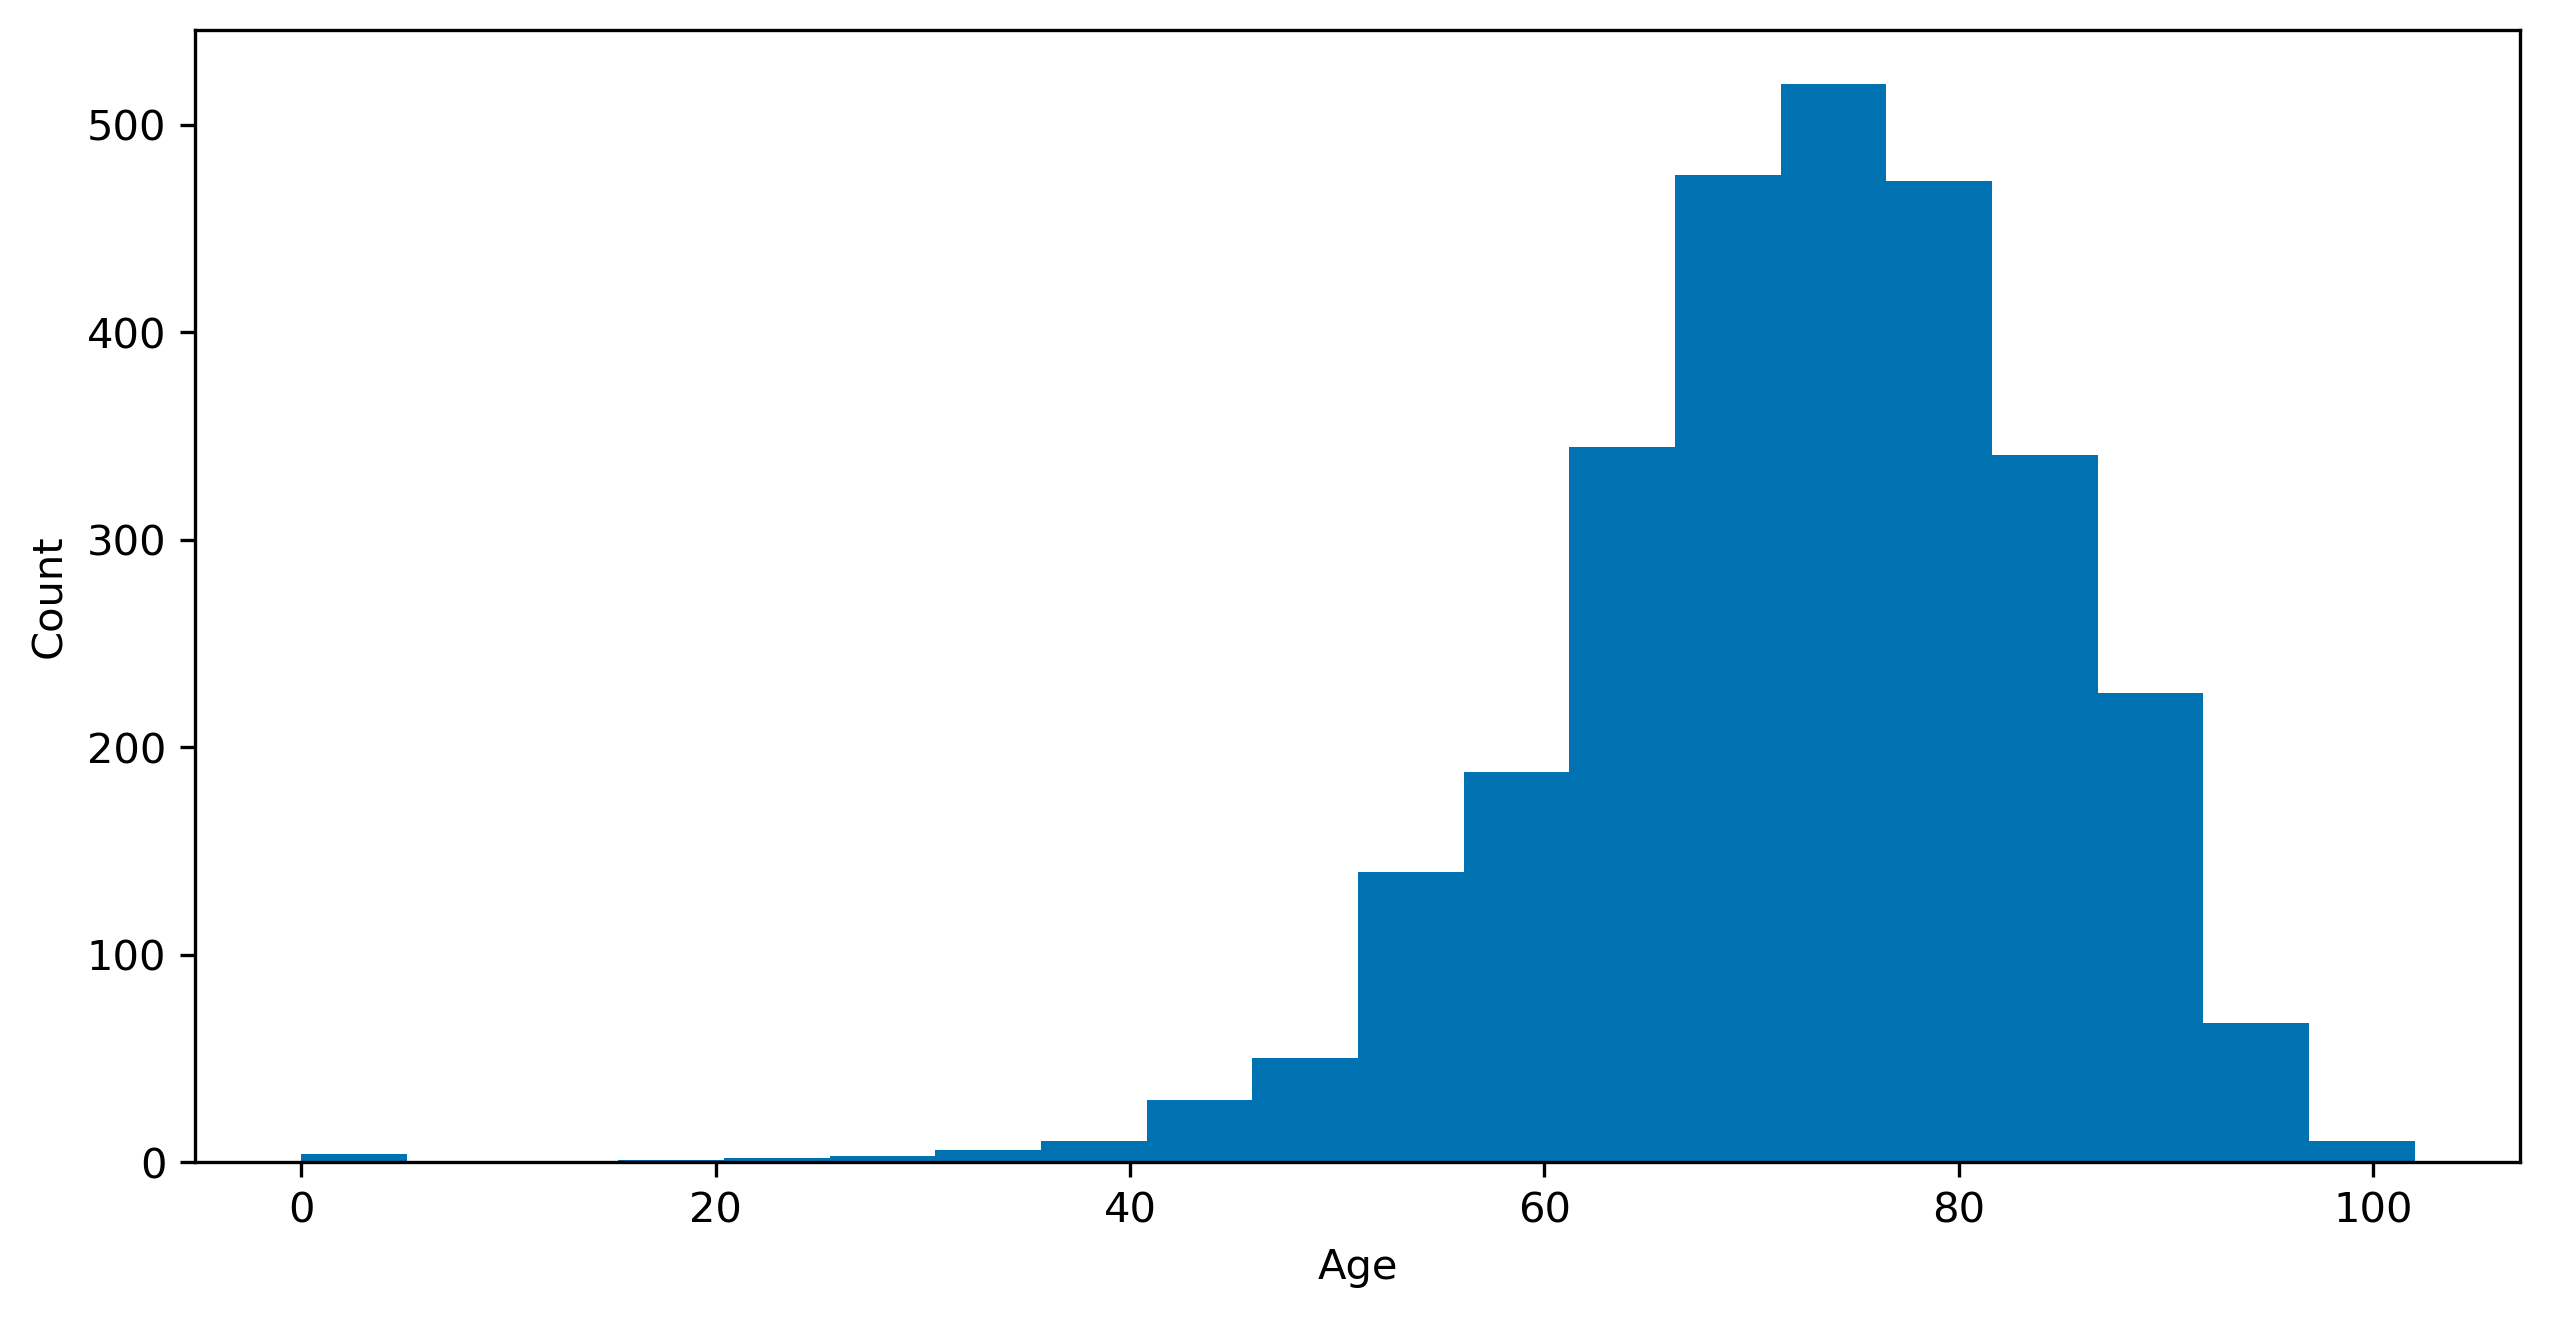

In [8]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

ages = copd.groupby("patient_id")["age"].median().dropna()
ax.hist(ages, bins=20)

ax.set_xlabel("Age")
ax.set_ylabel("Count")

In [9]:
# def reformat_decile(decile_string):

#     if not isinstance(decile_string, str):
#         return decile_string
    
#     direction, percentage = decile_string.split(" ")
#     number = int(percentage.replace("%", ""))

#     if direction.lower() == "highest":
#         return 100 - number
#     return number - 10

# copd["deprivation_decile"] = copd["deprivation_decile"].apply(
#     lambda decile_string: reformat_decile(decile_string)
# )

Text(0, 0.5, 'Count')

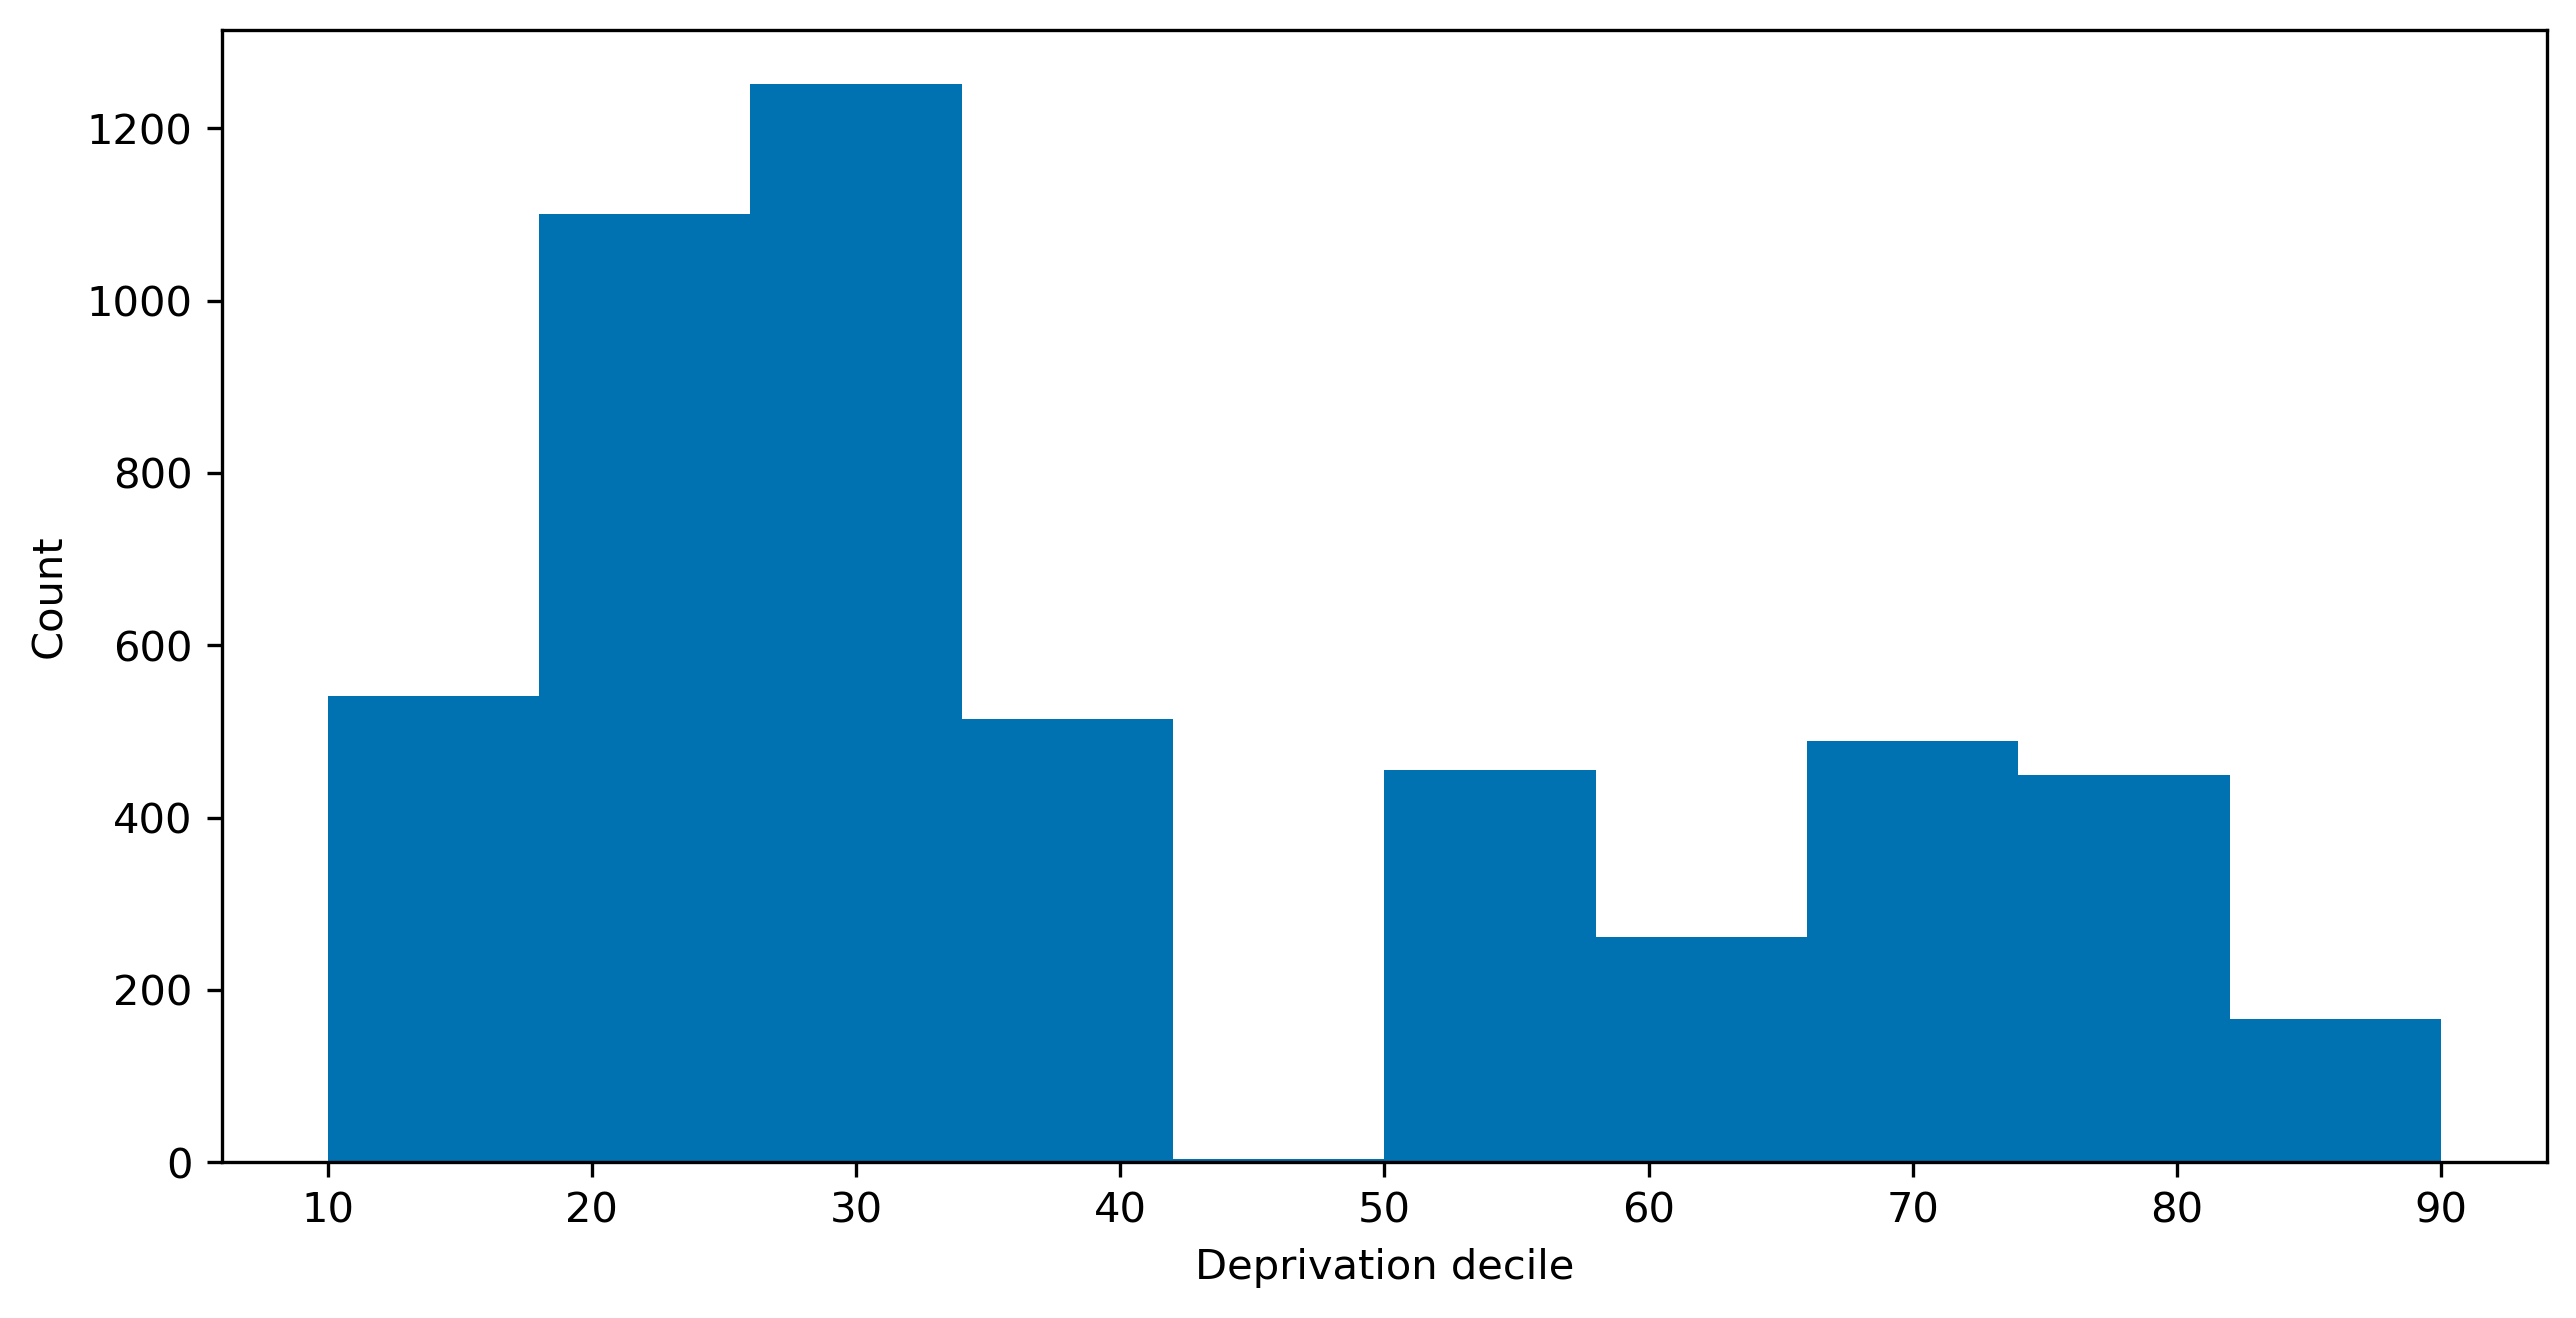

In [10]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

deprivation_deciles = copd.groupby("patient_id")["deprivation_decile"].median().dropna()

ax.hist(deprivation_deciles, bins=10)

ax.set_xlabel("Deprivation decile")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

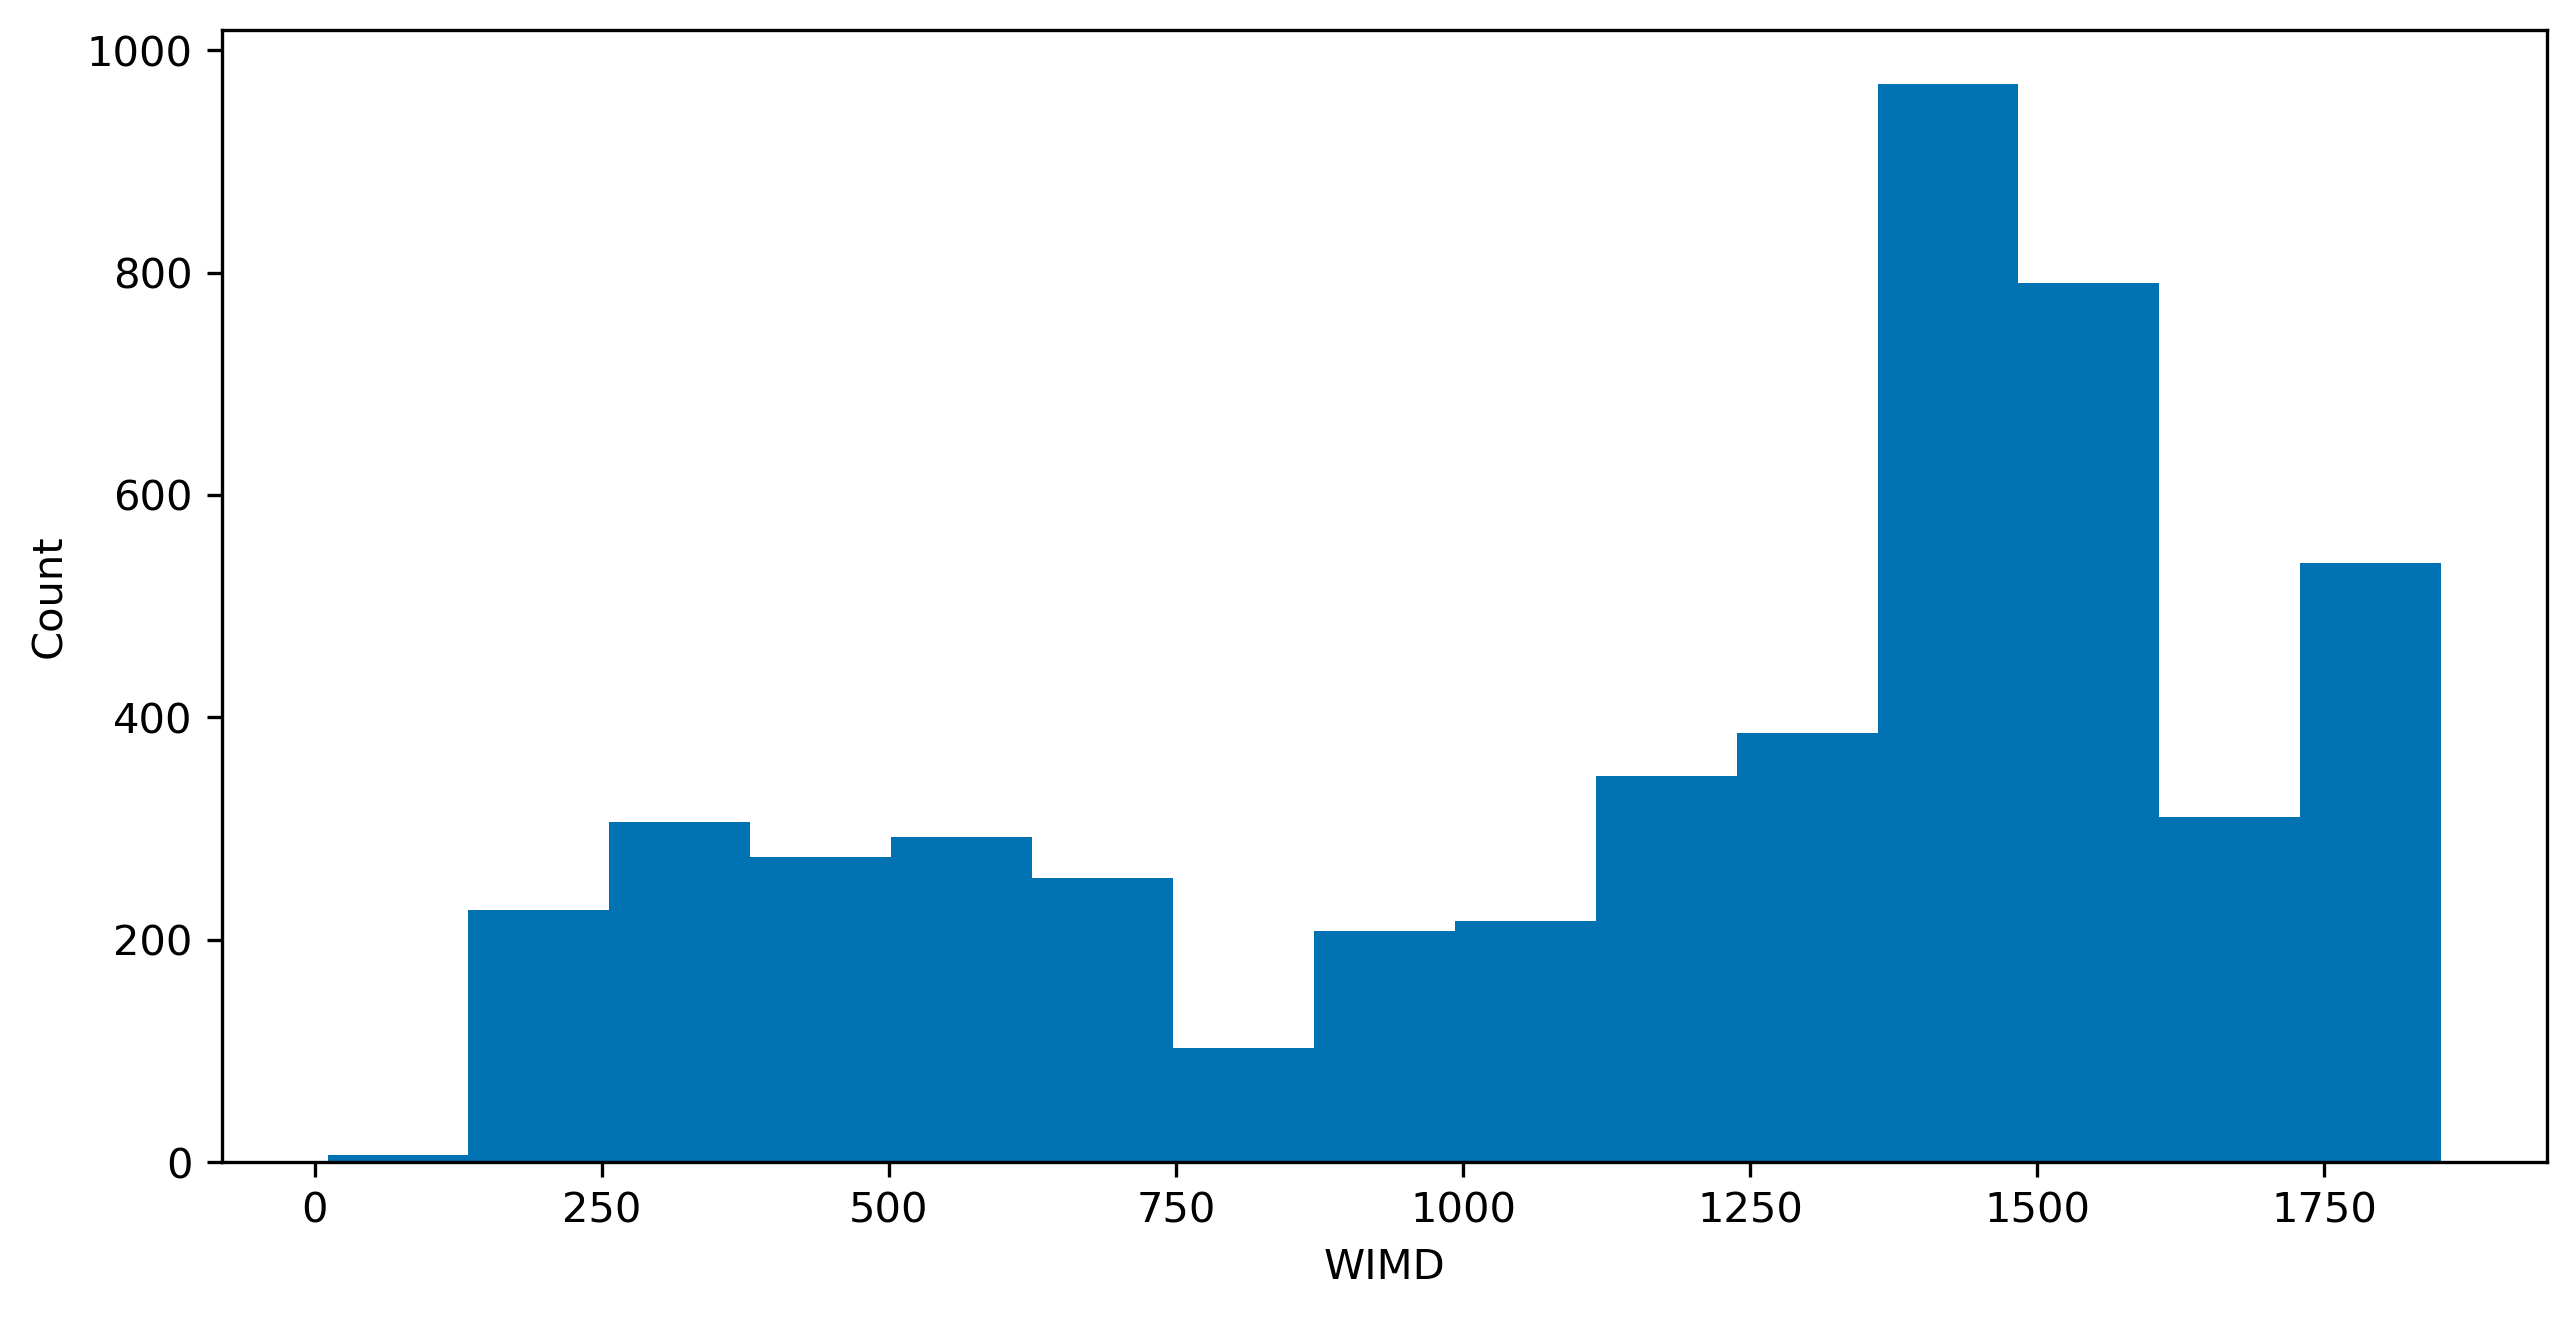

In [11]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

wimds = copd.groupby("patient_id")["wimd"].median().dropna()
ax.hist(wimds, bins=15)

ax.set_xlabel("WIMD")
ax.set_ylabel("Count")


In [12]:
# spell_costs = (
#     main[main["SPELL_ID"].isin(copd["spell_id"].values)].groupby(["SPELL_ID"])["NetCost"].sum().to_dict()
# )

# copd["spell_cost"] = copd["spell_id"].map(lambda spell_id: spell_costs.get(spell_id))

Text(0, 0.5, 'Count')

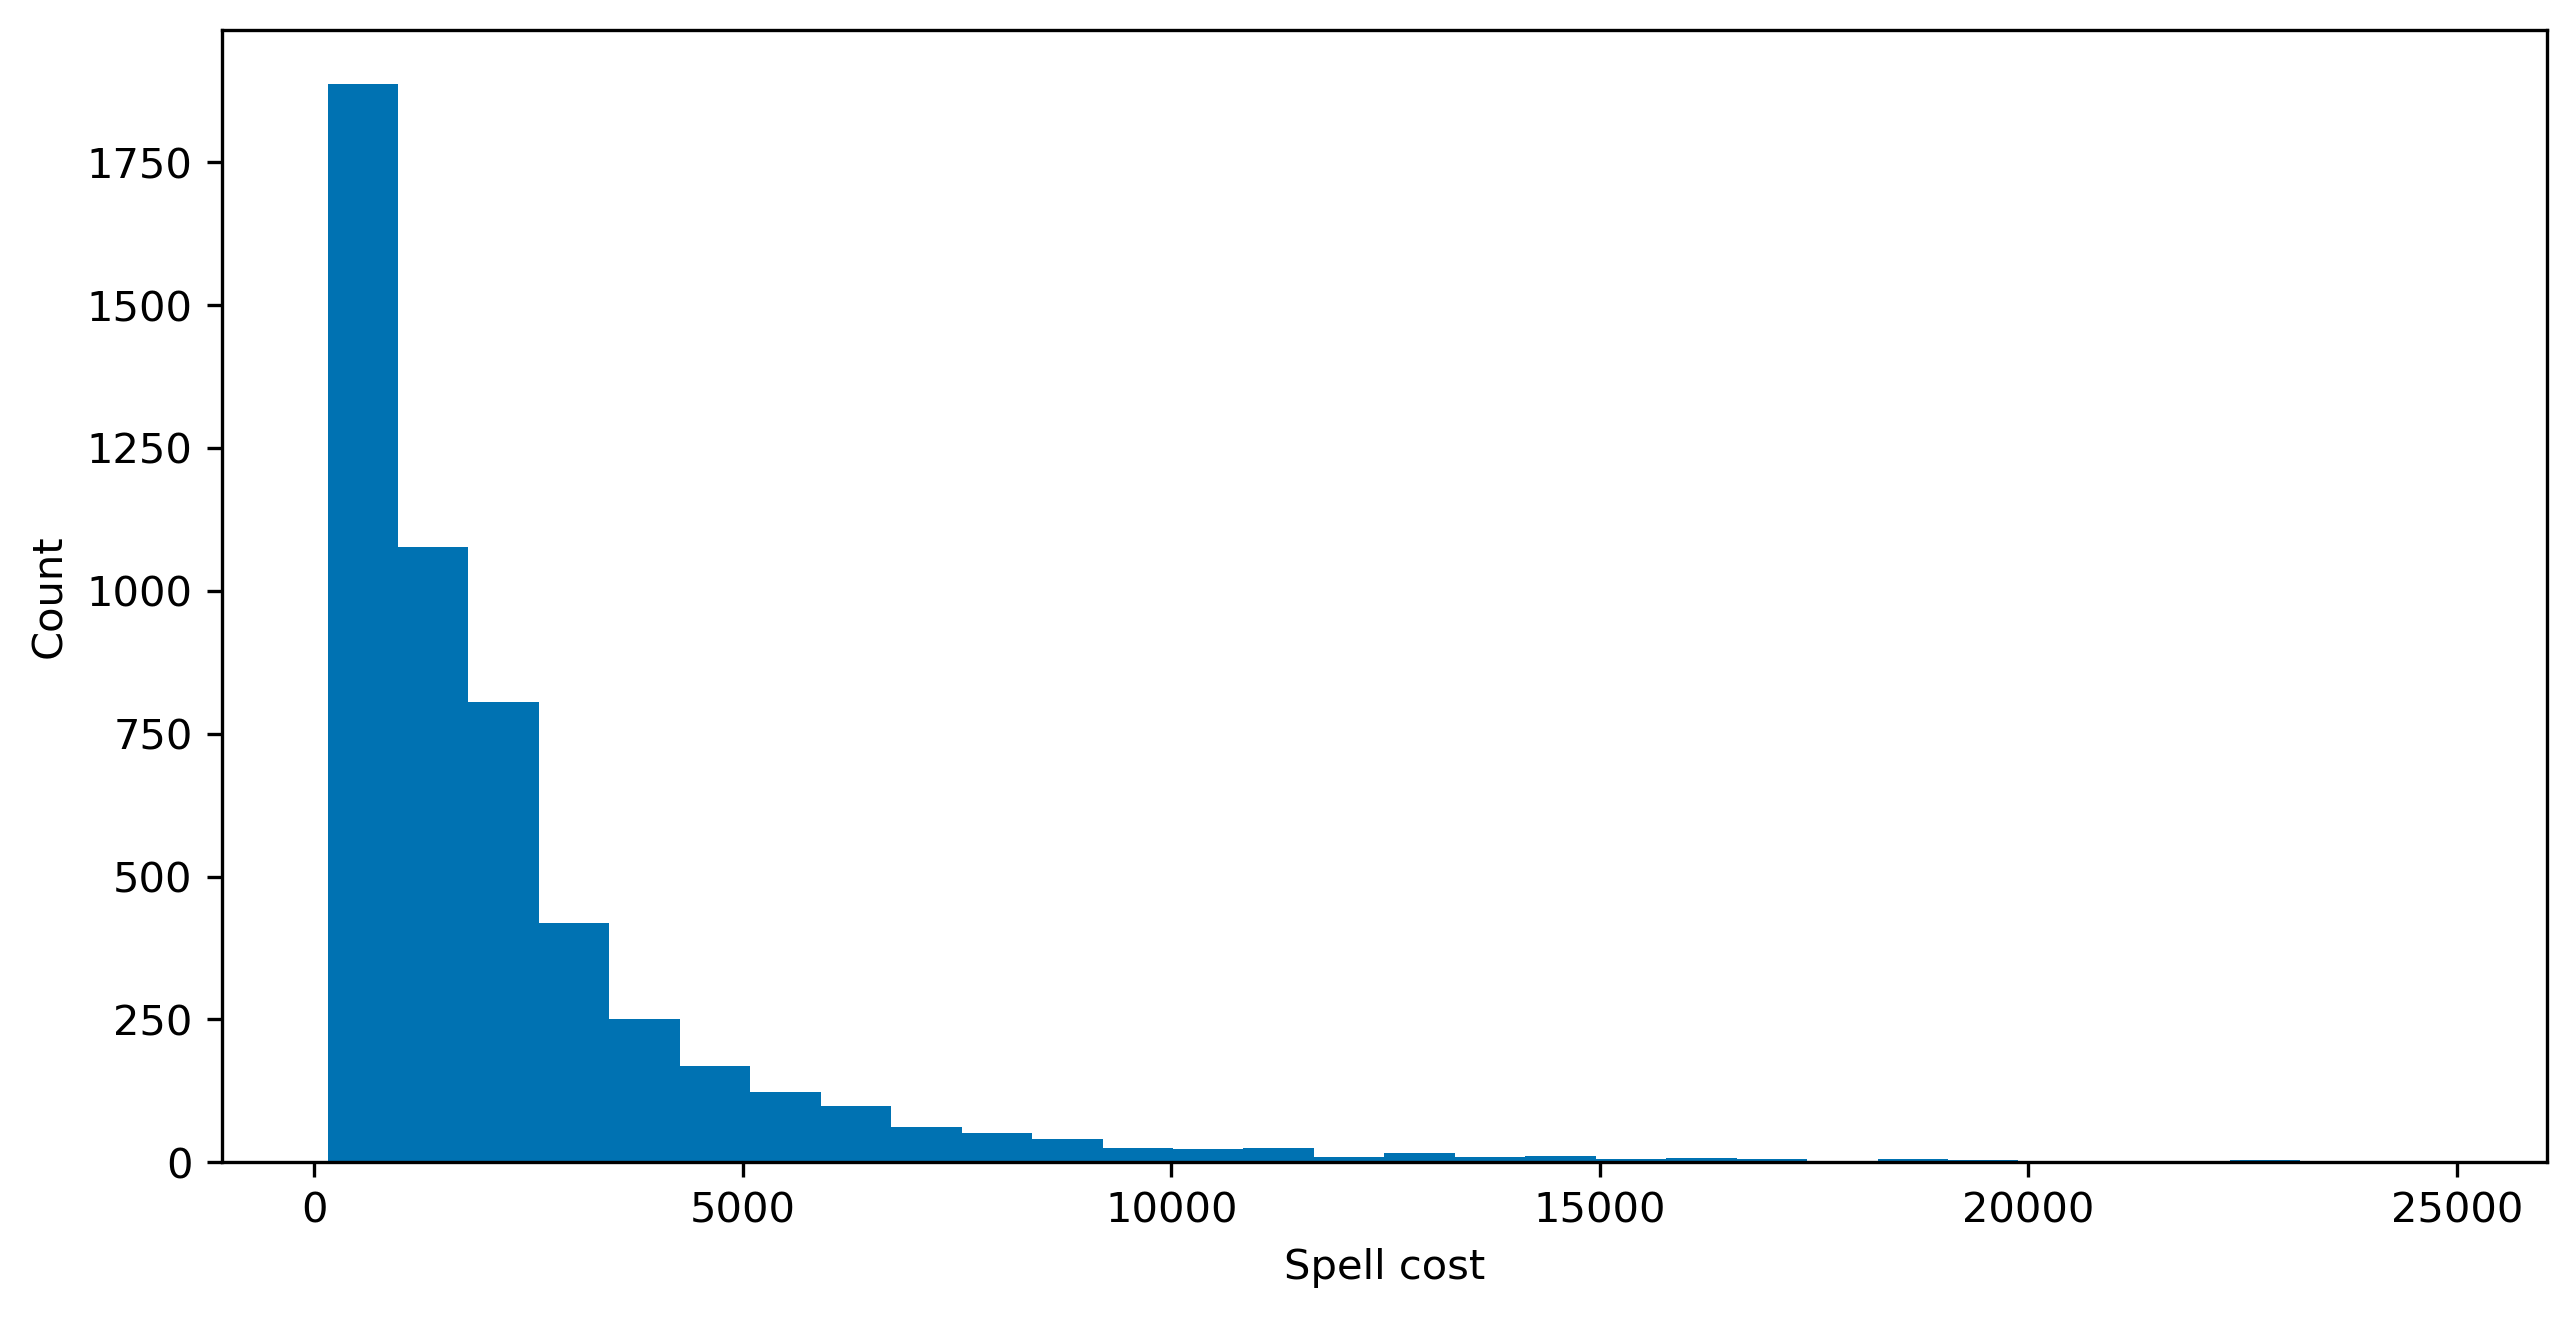

In [13]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

costs = copd["spell_cost"].dropna().values

ax.hist(costs, bins=30)

ax.set_xlabel("Spell cost")
ax.set_ylabel("Count")


# Looking at length of stay

In [14]:
copd["true_los"] = (copd["discharge_date"] - copd["admission_date"]).dt.total_seconds() / (24*60*60)
copd[["los", "true_los"]].describe().iloc[1:, :]

,los,true_los
mean,7.823346,7.855679
std,16.084912,16.059508
min,0.000000,-0.020833
25%,1.000000,1.486111
50%,4.000000,4.190278
75%,9.000000,8.928472
max,995.000000,995.056250


Text(0, 0.5, 'Length of stay (days)')

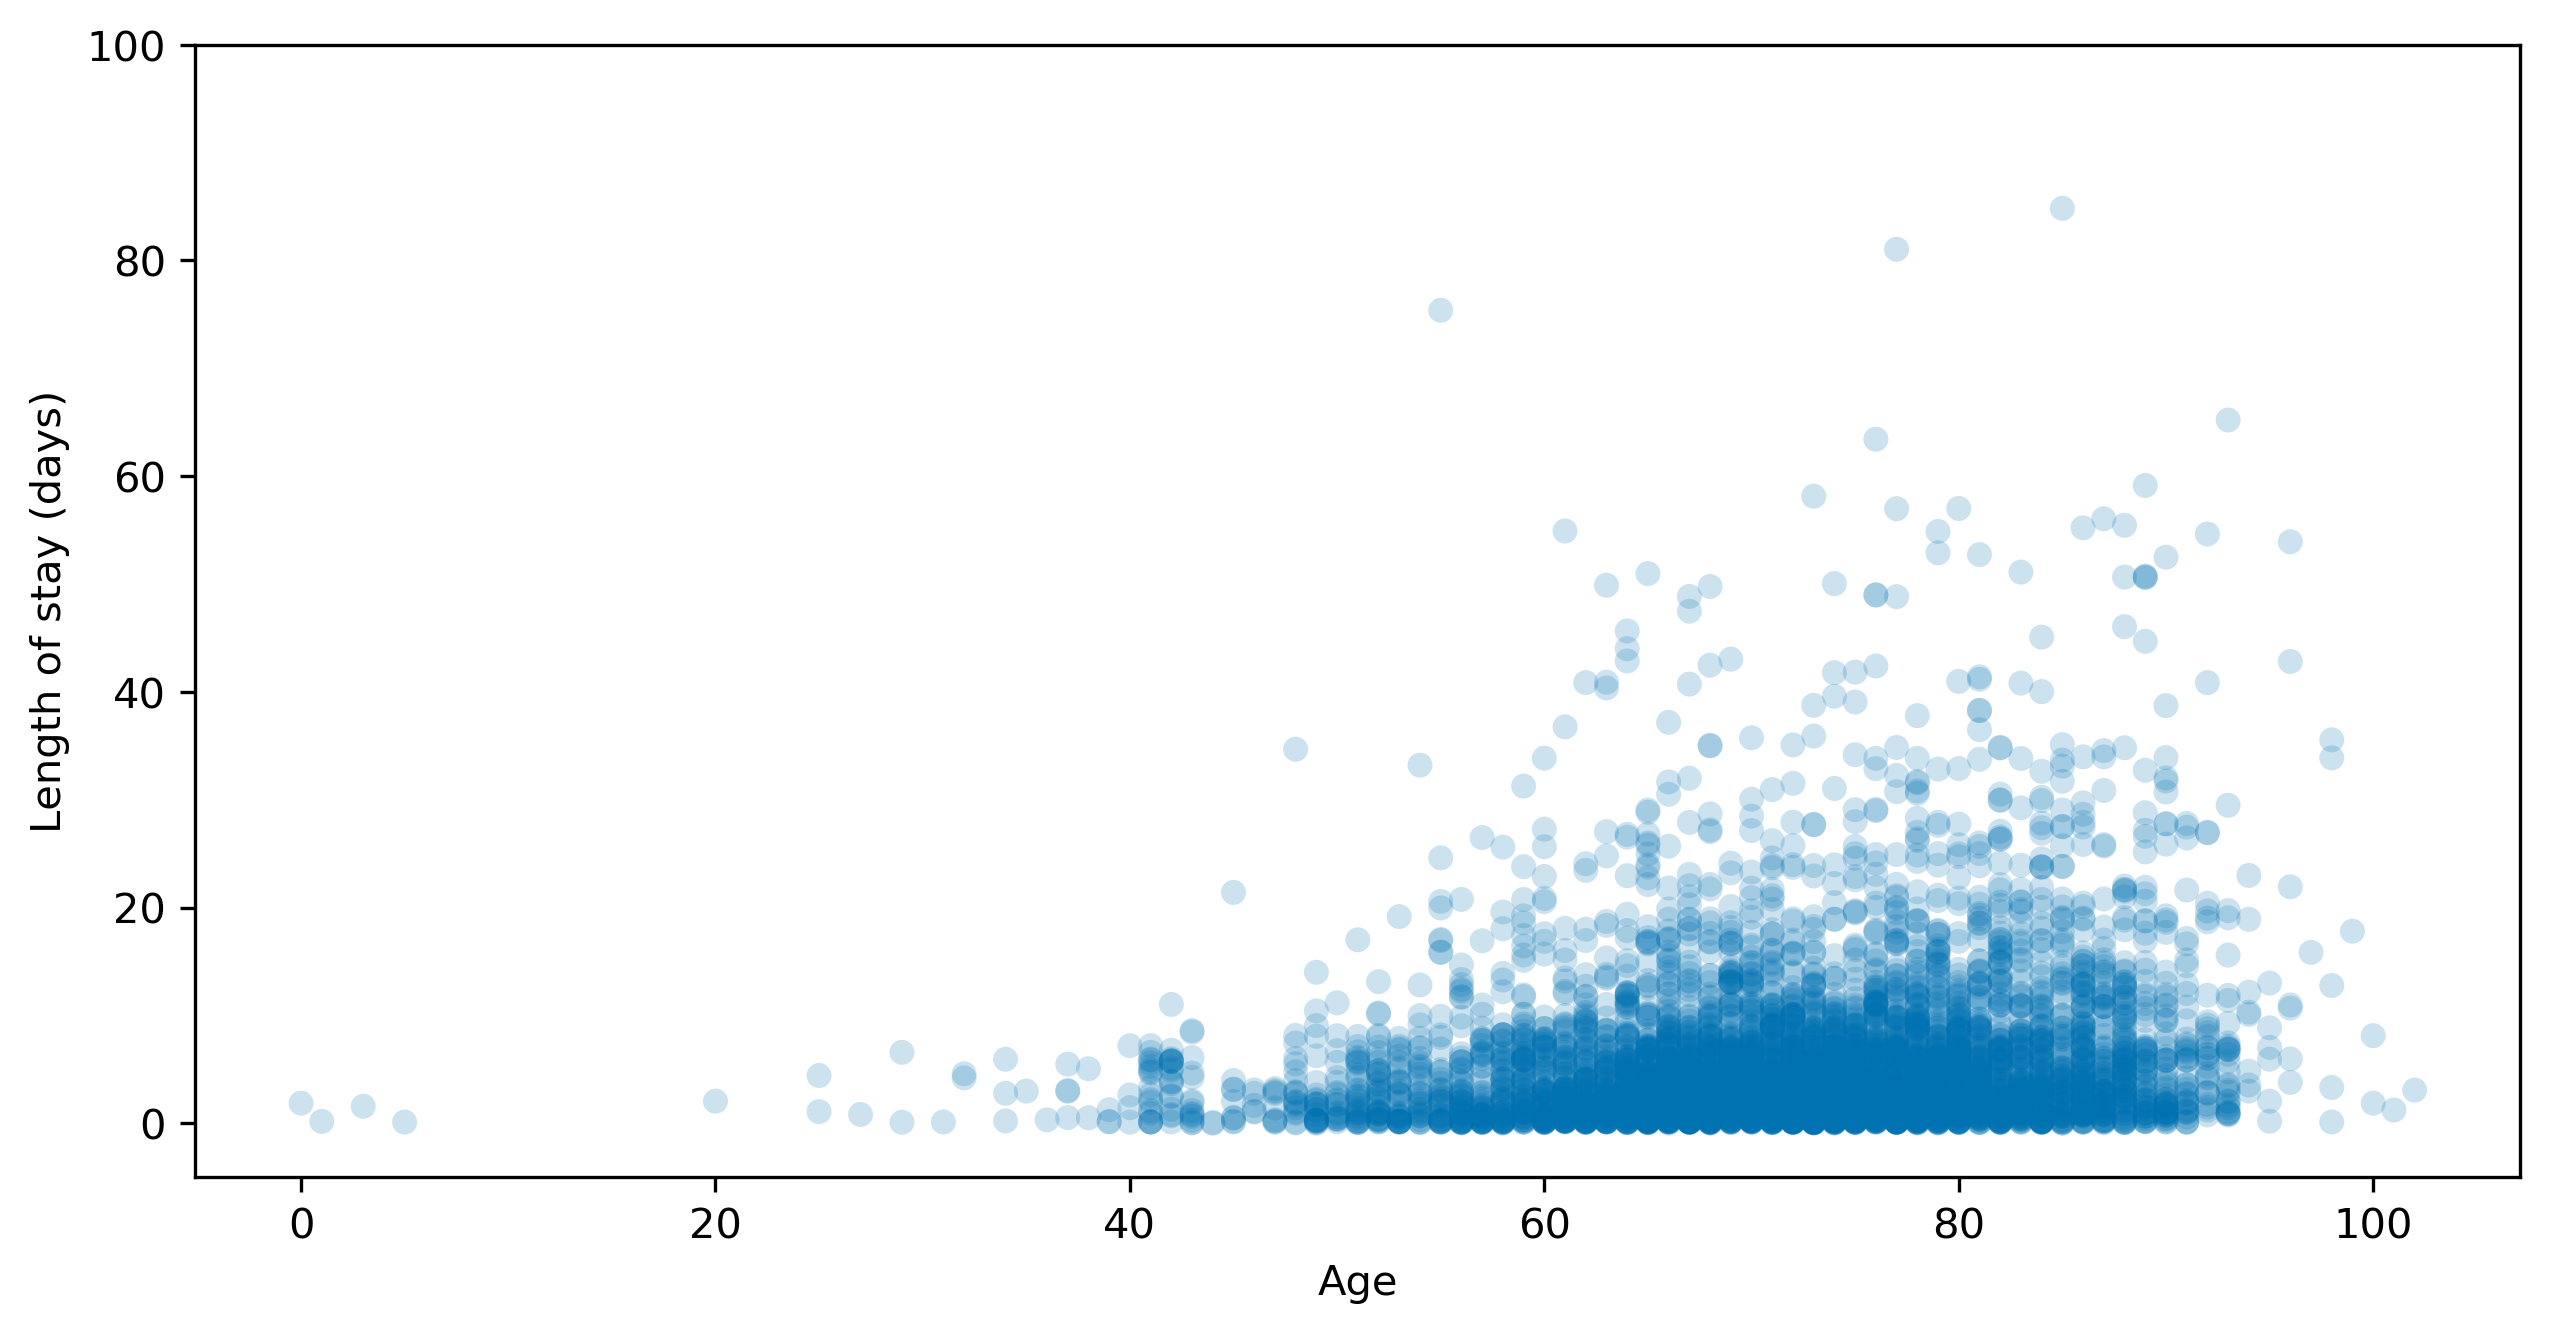

In [15]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

ax.scatter(copd["age"], copd["true_los"], alpha=0.2, edgecolor="None")

ax.set_ylim(-5, 100)
ax.set_xlabel("Age")
ax.set_ylabel("Length of stay (days)")

[Text(0, 0, 'F'), Text(0, 0, 'M')]

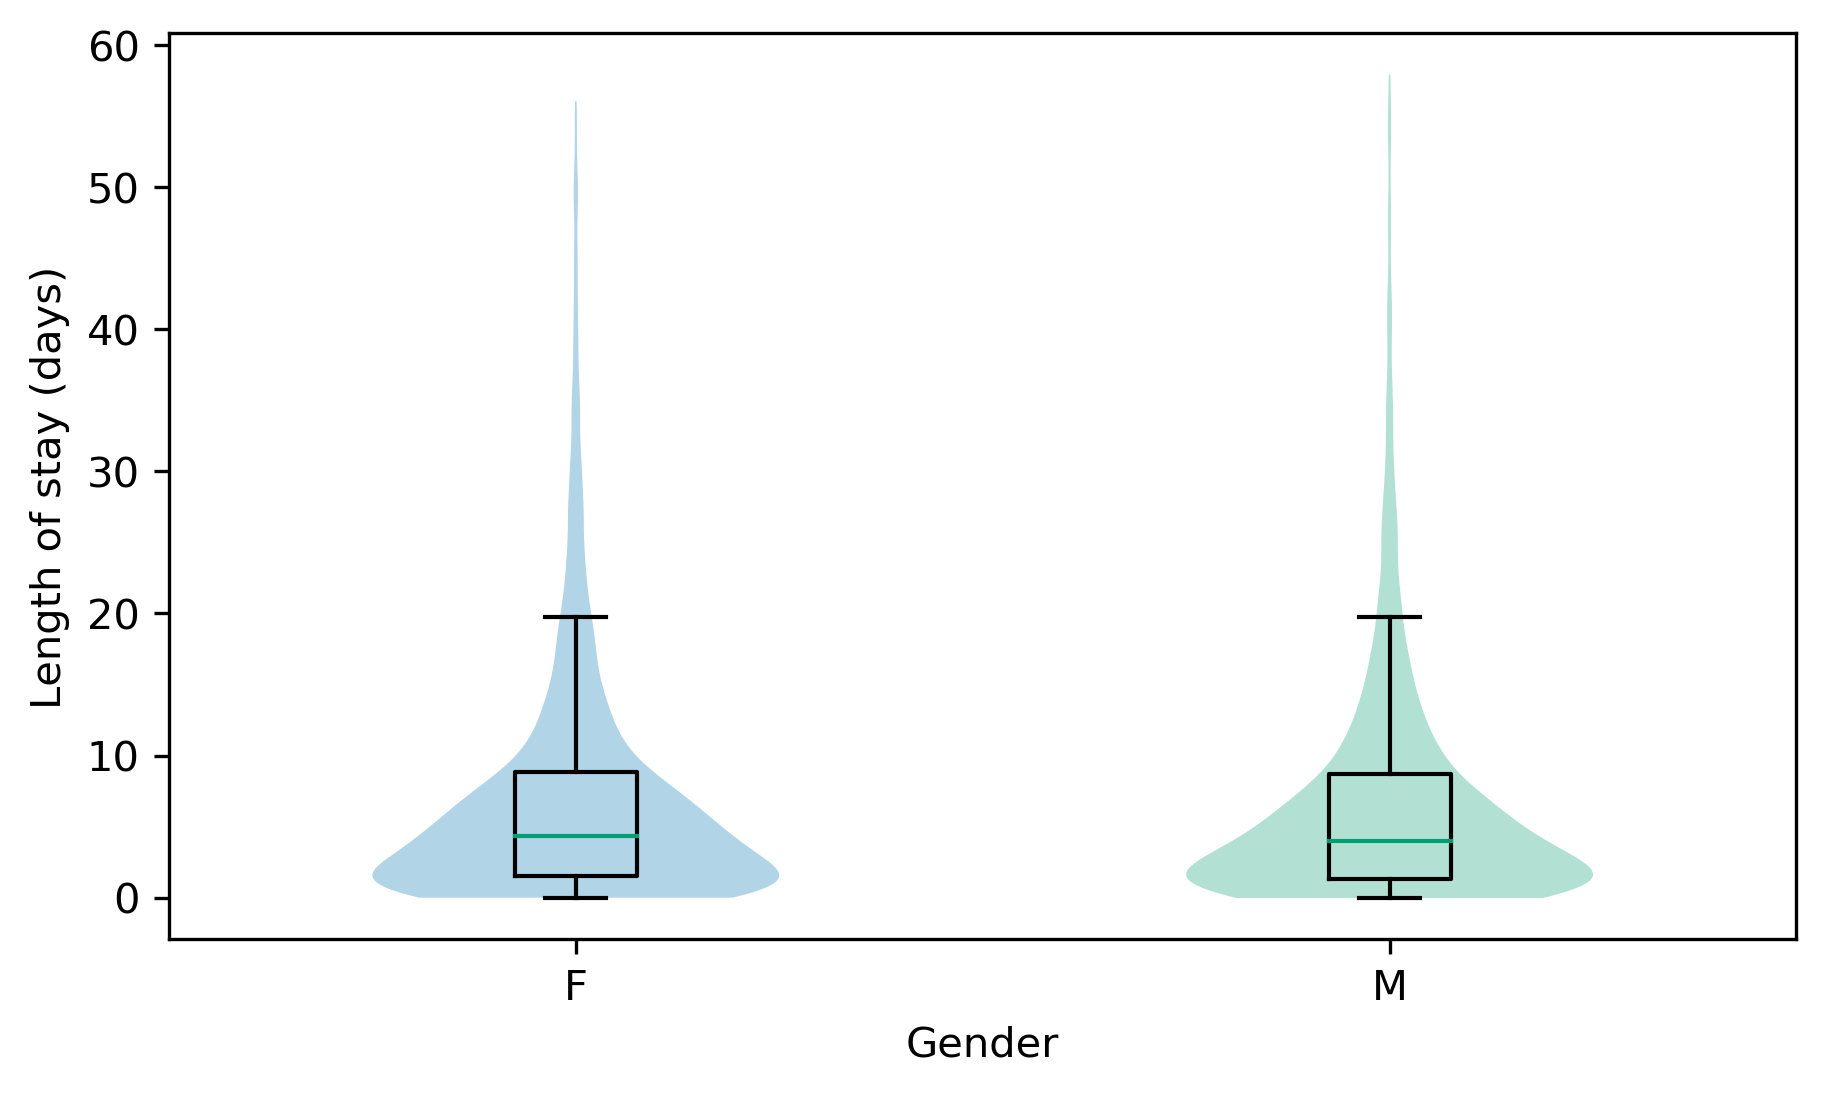

In [16]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=300)

xticklabels = []
for pos, (gender, los_values) in enumerate(copd.groupby("gender")["true_los"]):

    trimmed_values = los_values[los_values < np.percentile(los_values, 99)]
    ax.violinplot(trimmed_values, (pos,), showextrema=False, points=1000)
    ax.boxplot(trimmed_values, positions=(pos,), sym="")
    xticklabels.append(gender)

ax.set_xlabel("Gender")
ax.set_ylabel("Length of stay (days)")
ax.set_xticklabels(xticklabels)

Text(0, 0.5, 'Length of stay (days)')

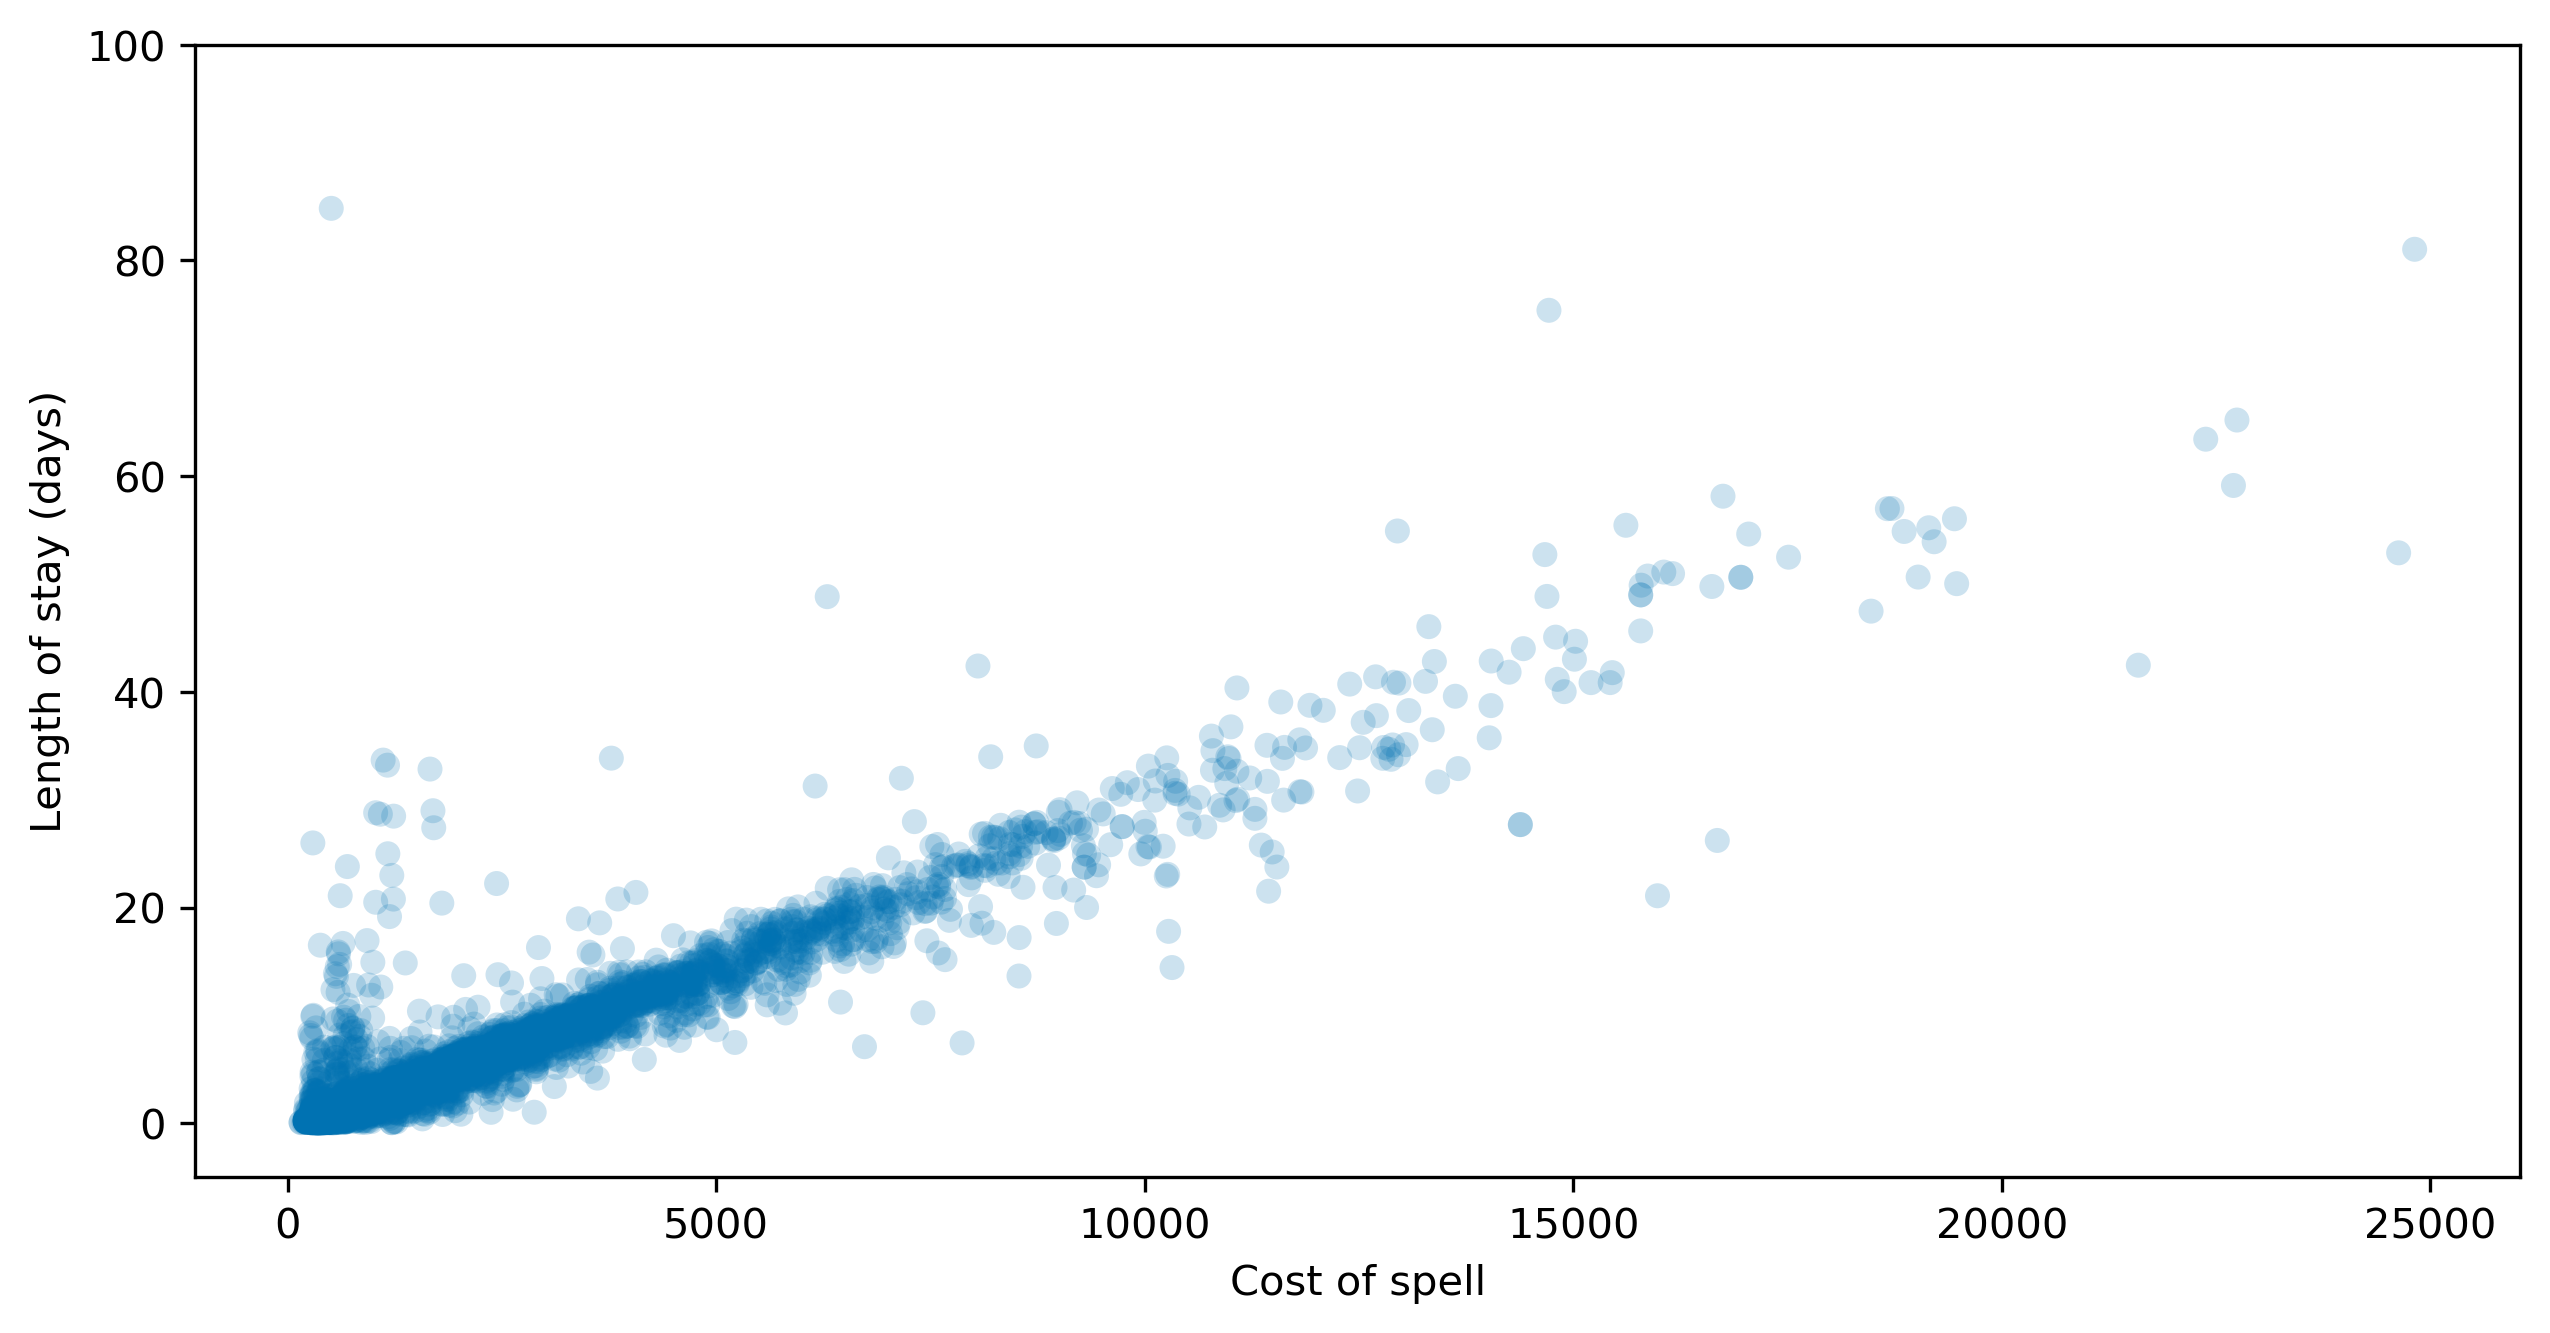

In [17]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

ax.scatter(copd["spell_cost"], copd["true_los"], alpha=0.2, edgecolor="None")

ax.set_ylim(-5, 100)
ax.set_xlabel("Cost of spell")
ax.set_ylabel("Length of stay (days)")

Text(0, 0.5, 'Length of stay (days)')

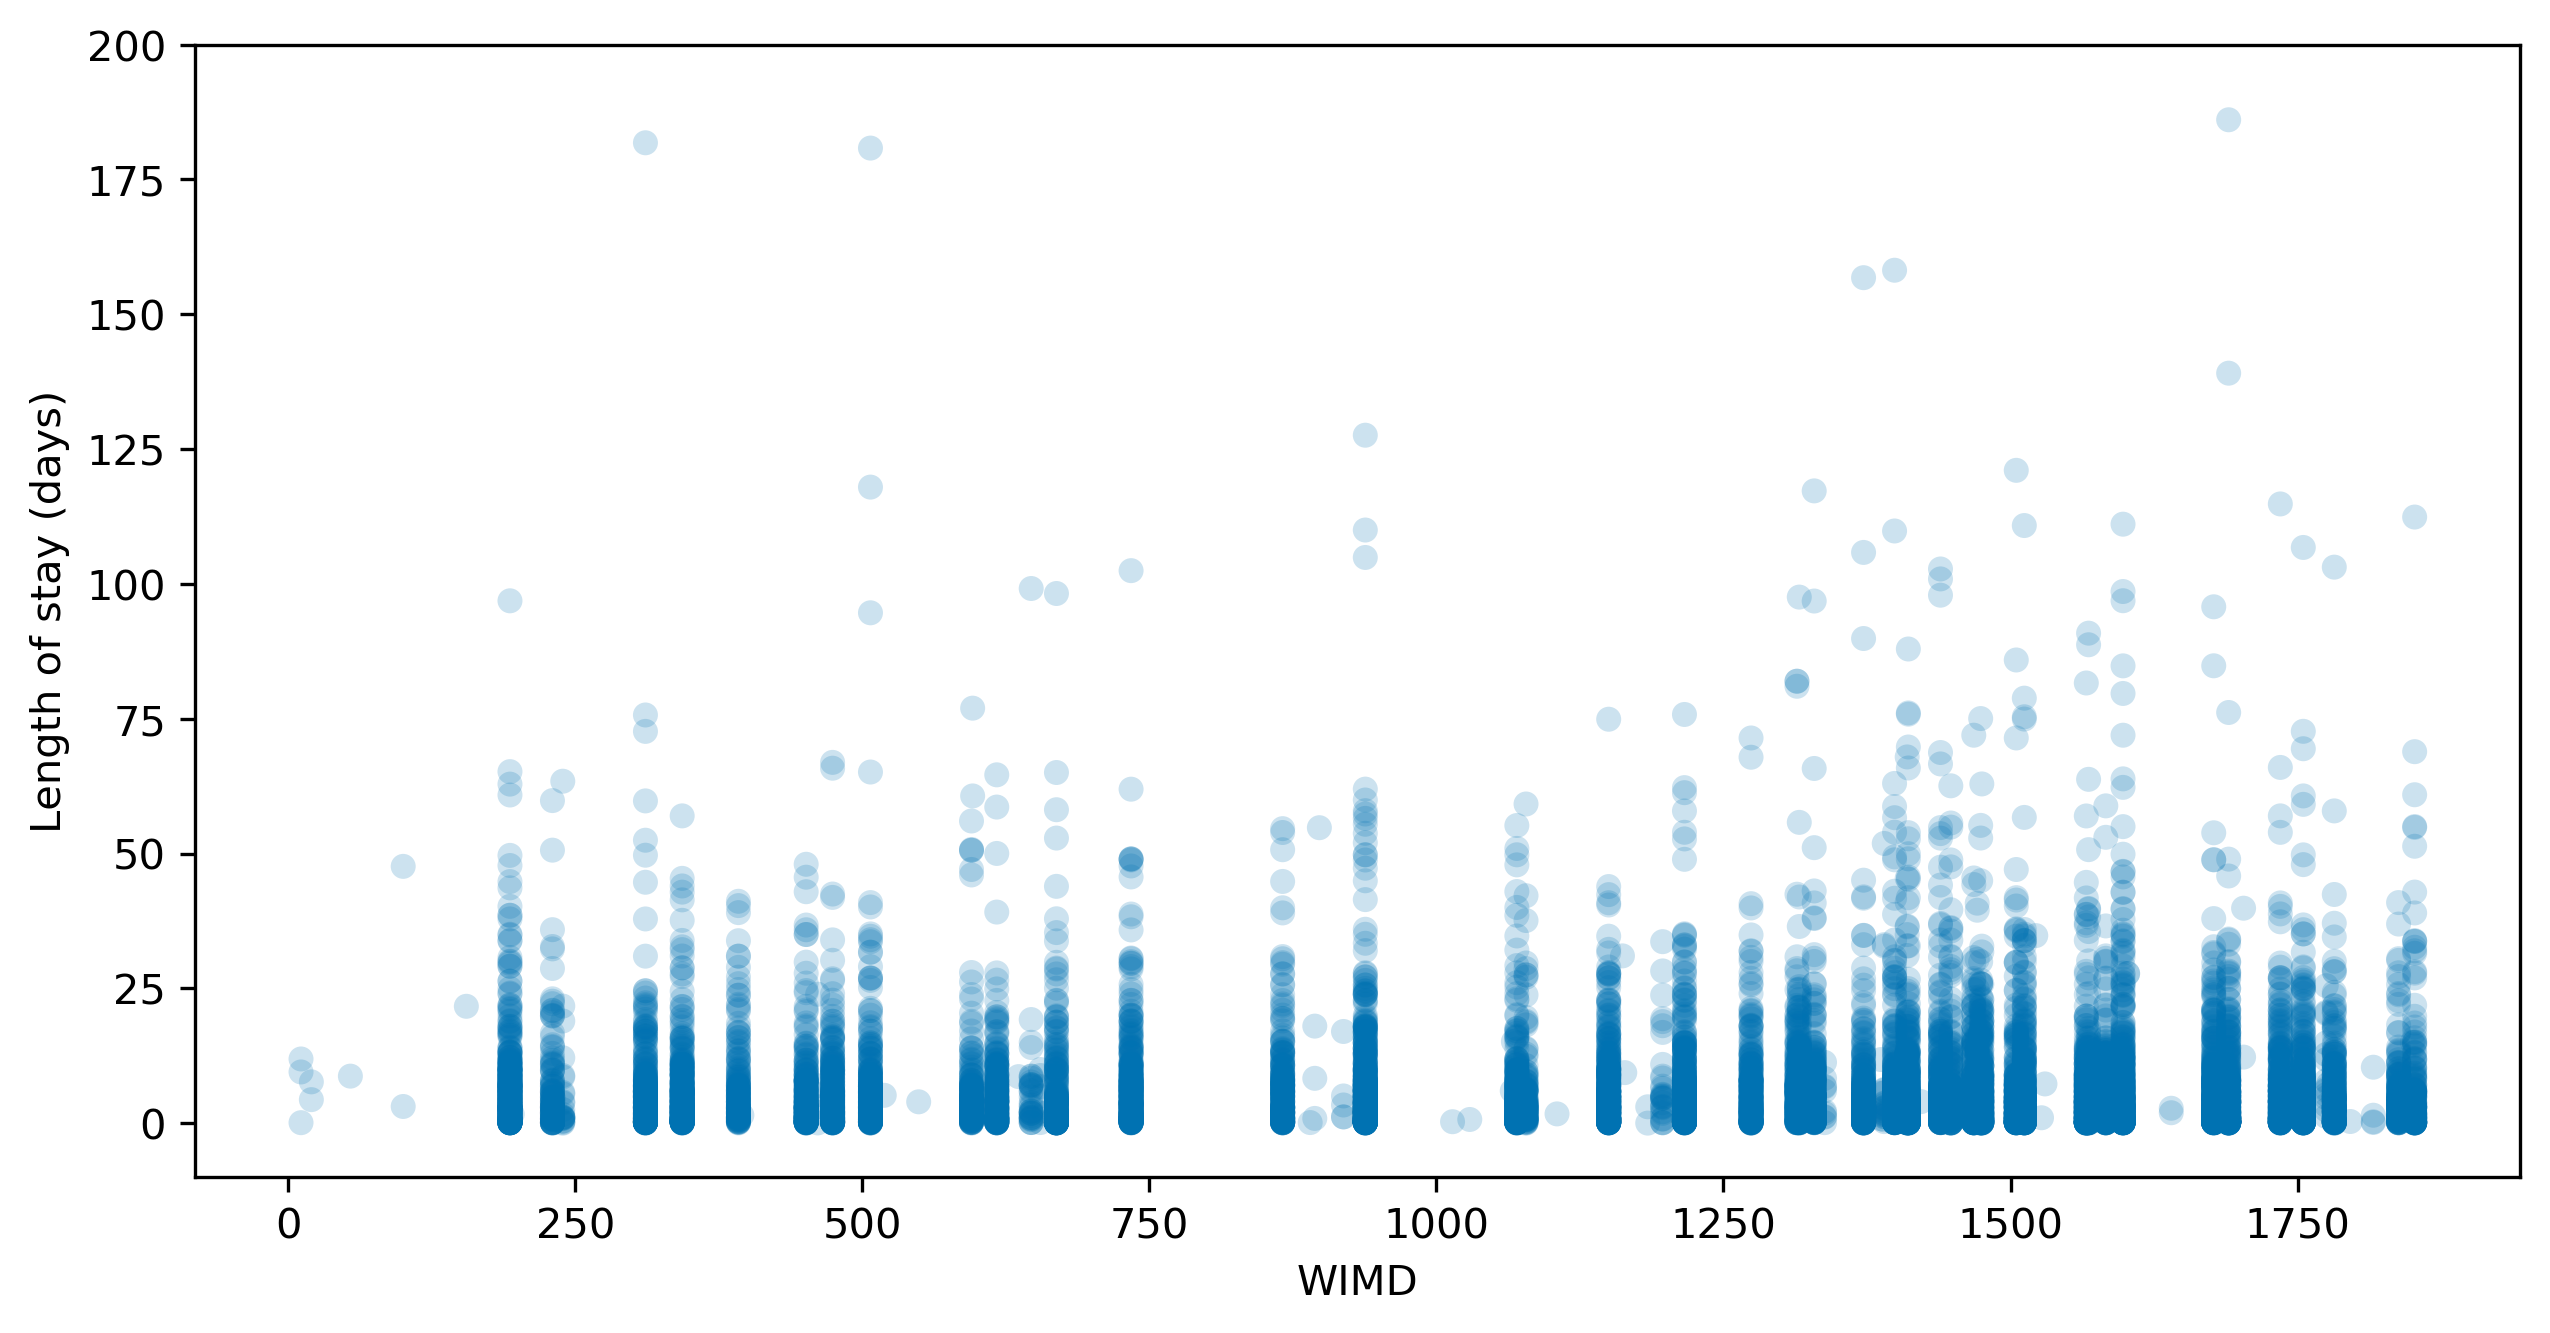

In [18]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

ax.scatter(copd["wimd"], copd["true_los"], alpha=0.2, edgecolor="None")

ax.set_ylim(-10, 200)

ax.set_xlabel("WIMD")
ax.set_ylabel("Length of stay (days)")

# Summarising ICD codes

It is likely that diagnosis will be helpful in predicting length of stay or intervention later on.

So, let us summarise the ICD codes by their main categories (via: the [WHO website](https://icd.who.int/browse10/2016/en)). To begin, each spell's ICD codes must be collated and stacked:

In [19]:
copd_icds = pd.DataFrame(
    copd["icd_codes"].str.split("|").apply(
        lambda codes: [code.strip() for code in codes]
    ).tolist(),
    index=copd["spell_id"],
).stack().reset_index().drop("level_1", axis=1)

copd_icds.columns = ["spell_id", "icd_code"]
copd_icds.head(15)

,spell_id,icd_code
0,M801616557,J448
1,M801616557,Z954
2,M801616557,R798
3,M801616557,N189
4,M801616557,D696
5,M801616557,Z950
6,M801616557,D649
7,M801616557,I489
8,M801616557,I272
9,M801616557,J988


In [20]:
f"There are {copd_icds['icd_code'].nunique()} unique ICDs present."

'There are 1926 unique ICDs present.'

These are the code ranges taken from the website. Each ICD is encoded as a string of length 3 (the stem) plus some sub-category. To make things easier and to avoid any discrepancies in the encoding, we'll only deal with the stem.

In [21]:
icd_ranges = {
    "infectious": ("A00", "B99"), "neoplasms": ("C00", "D48"),
    "blood": ("D50", "D89"), "endocrine": ("E00", "E90"),
    "mental": ("F00", "F99"), "nervous": ("G00", "G99"),
    "eye": ("H00", "H59"), "ear": ("H60", "H95"),
    "circulatory": ("I00", "I99"), "respiratory": ("J00", "J99"),
    "digestive": ("K00", "K93"), "skin": ("L00", "L99"),
    "muscoloskeletal": ("M00", "M99"),
    "genitourinary": ("N00", "N99"), "pregnancy": ("O00", "O99"),
    "perinatal": ("P00", "P99"), "congenital": ("Q00", "Q99"),
    "abnormal_findings": ("R00", "R99"),
    "injury": ("S00", "T98"), "external_causes": ("V01", "Y98"),
    "contact_factors": ("Z00", "Z99"),
    "special_use": ("U00", "U89"),
}


In [22]:
f"There are {len(icd_ranges)} ICD categories."

'There are 22 ICD categories.'

With the stems extracted, the next step is to effectively replace the stem column by its category.

In [23]:
copd_icds["icd_code_stem"] = copd_icds["icd_code"].copy().str.slice(start=0, stop=3, step=1)

copd_icds["category"] = copd_icds["icd_code_stem"].copy()
for category, limits in icd_ranges.items():
    copd_icds["category"] = np.where(
        copd_icds["icd_code_stem"].between(*limits), category, copd_icds["category"]
    )

copd_icds.head()

,spell_id,icd_code,icd_code_stem,category
0,M801616557,J448,J44,respiratory
1,M801616557,Z954,Z95,contact_factors
2,M801616557,R798,R79,abnormal_findings
3,M801616557,N189,N18,genitourinary
4,M801616557,D696,D69,blood


In [24]:
observed_icds = copd_icds["category"].unique()

f"There are {len(observed_icds)} unique ICD categories present."

if len(observed_icds) < len(icd_ranges):
    print(f"Missing categories: {set(icd_ranges.keys()).difference(observed_icds)}")

Missing categories: {'pregnancy'}


Now so we can merge this data with the original `copd` dataframe, we must group by `spell_id`, collate the categories and count the occurrences of each category. This is done using `pd.get_dummies()`.

In [25]:
spell_icds_list = copd_icds.groupby("spell_id")["category"].apply(list).reset_index()
spell_icds_list.head()


,spell_id,category
0,M126601423287,"[respiratory, infectious, contact_factors]"
1,M126601423852,"[respiratory, contact_factors, digestive, resp..."
2,M126601424305,"[respiratory, circulatory, mental, abnormal_fi..."
3,M126601424325,"[respiratory, mental, digestive, genitourinary..."
4,M126601424579,"[respiratory, digestive, respiratory, respirat..."


In [26]:
stacked_spell_icds = spell_icds_list["category"].apply(pd.Series).stack()

spell_icds = pd.get_dummies(stacked_spell_icds).sum(level=0)
spell_icds["n_icds"] = spell_icds.sum(axis=1)
spell_icds = spell_icds.join(spell_icds_list["spell_id"], how="outer")

spell_icds.head()


,abnormal_findings,blood,circulatory,congenital,contact_factors,digestive,ear,endocrine,external_causes,eye,...,mental,muscoloskeletal,neoplasms,nervous,perinatal,respiratory,skin,special_use,n_icds,spell_id
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,M126601423287
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,2,0,0,4,M126601423852
2,1,0,2,0,0,0,0,0,0,0,...,1,2,0,0,0,1,0,0,7,M126601424305
3,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,3,0,0,8,M126601424325
4,0,0,1,0,0,2,0,0,0,0,...,0,1,0,0,0,3,0,0,7,M126601424579


In [27]:
if not set(spell_icds.columns).issubset(copd.columns):
    copd = copd.merge(spell_icds, how="inner", on="spell_id")

# LOS by category

In [28]:
los_by_category = {}
for category in copd_icds["category"].unique():
    los_by_category[category] = copd[copd[category] > 0]["true_los"].values

los_by_category_items = sorted(los_by_category.items(), key=lambda cat_values: -np.median(cat_values[1]))


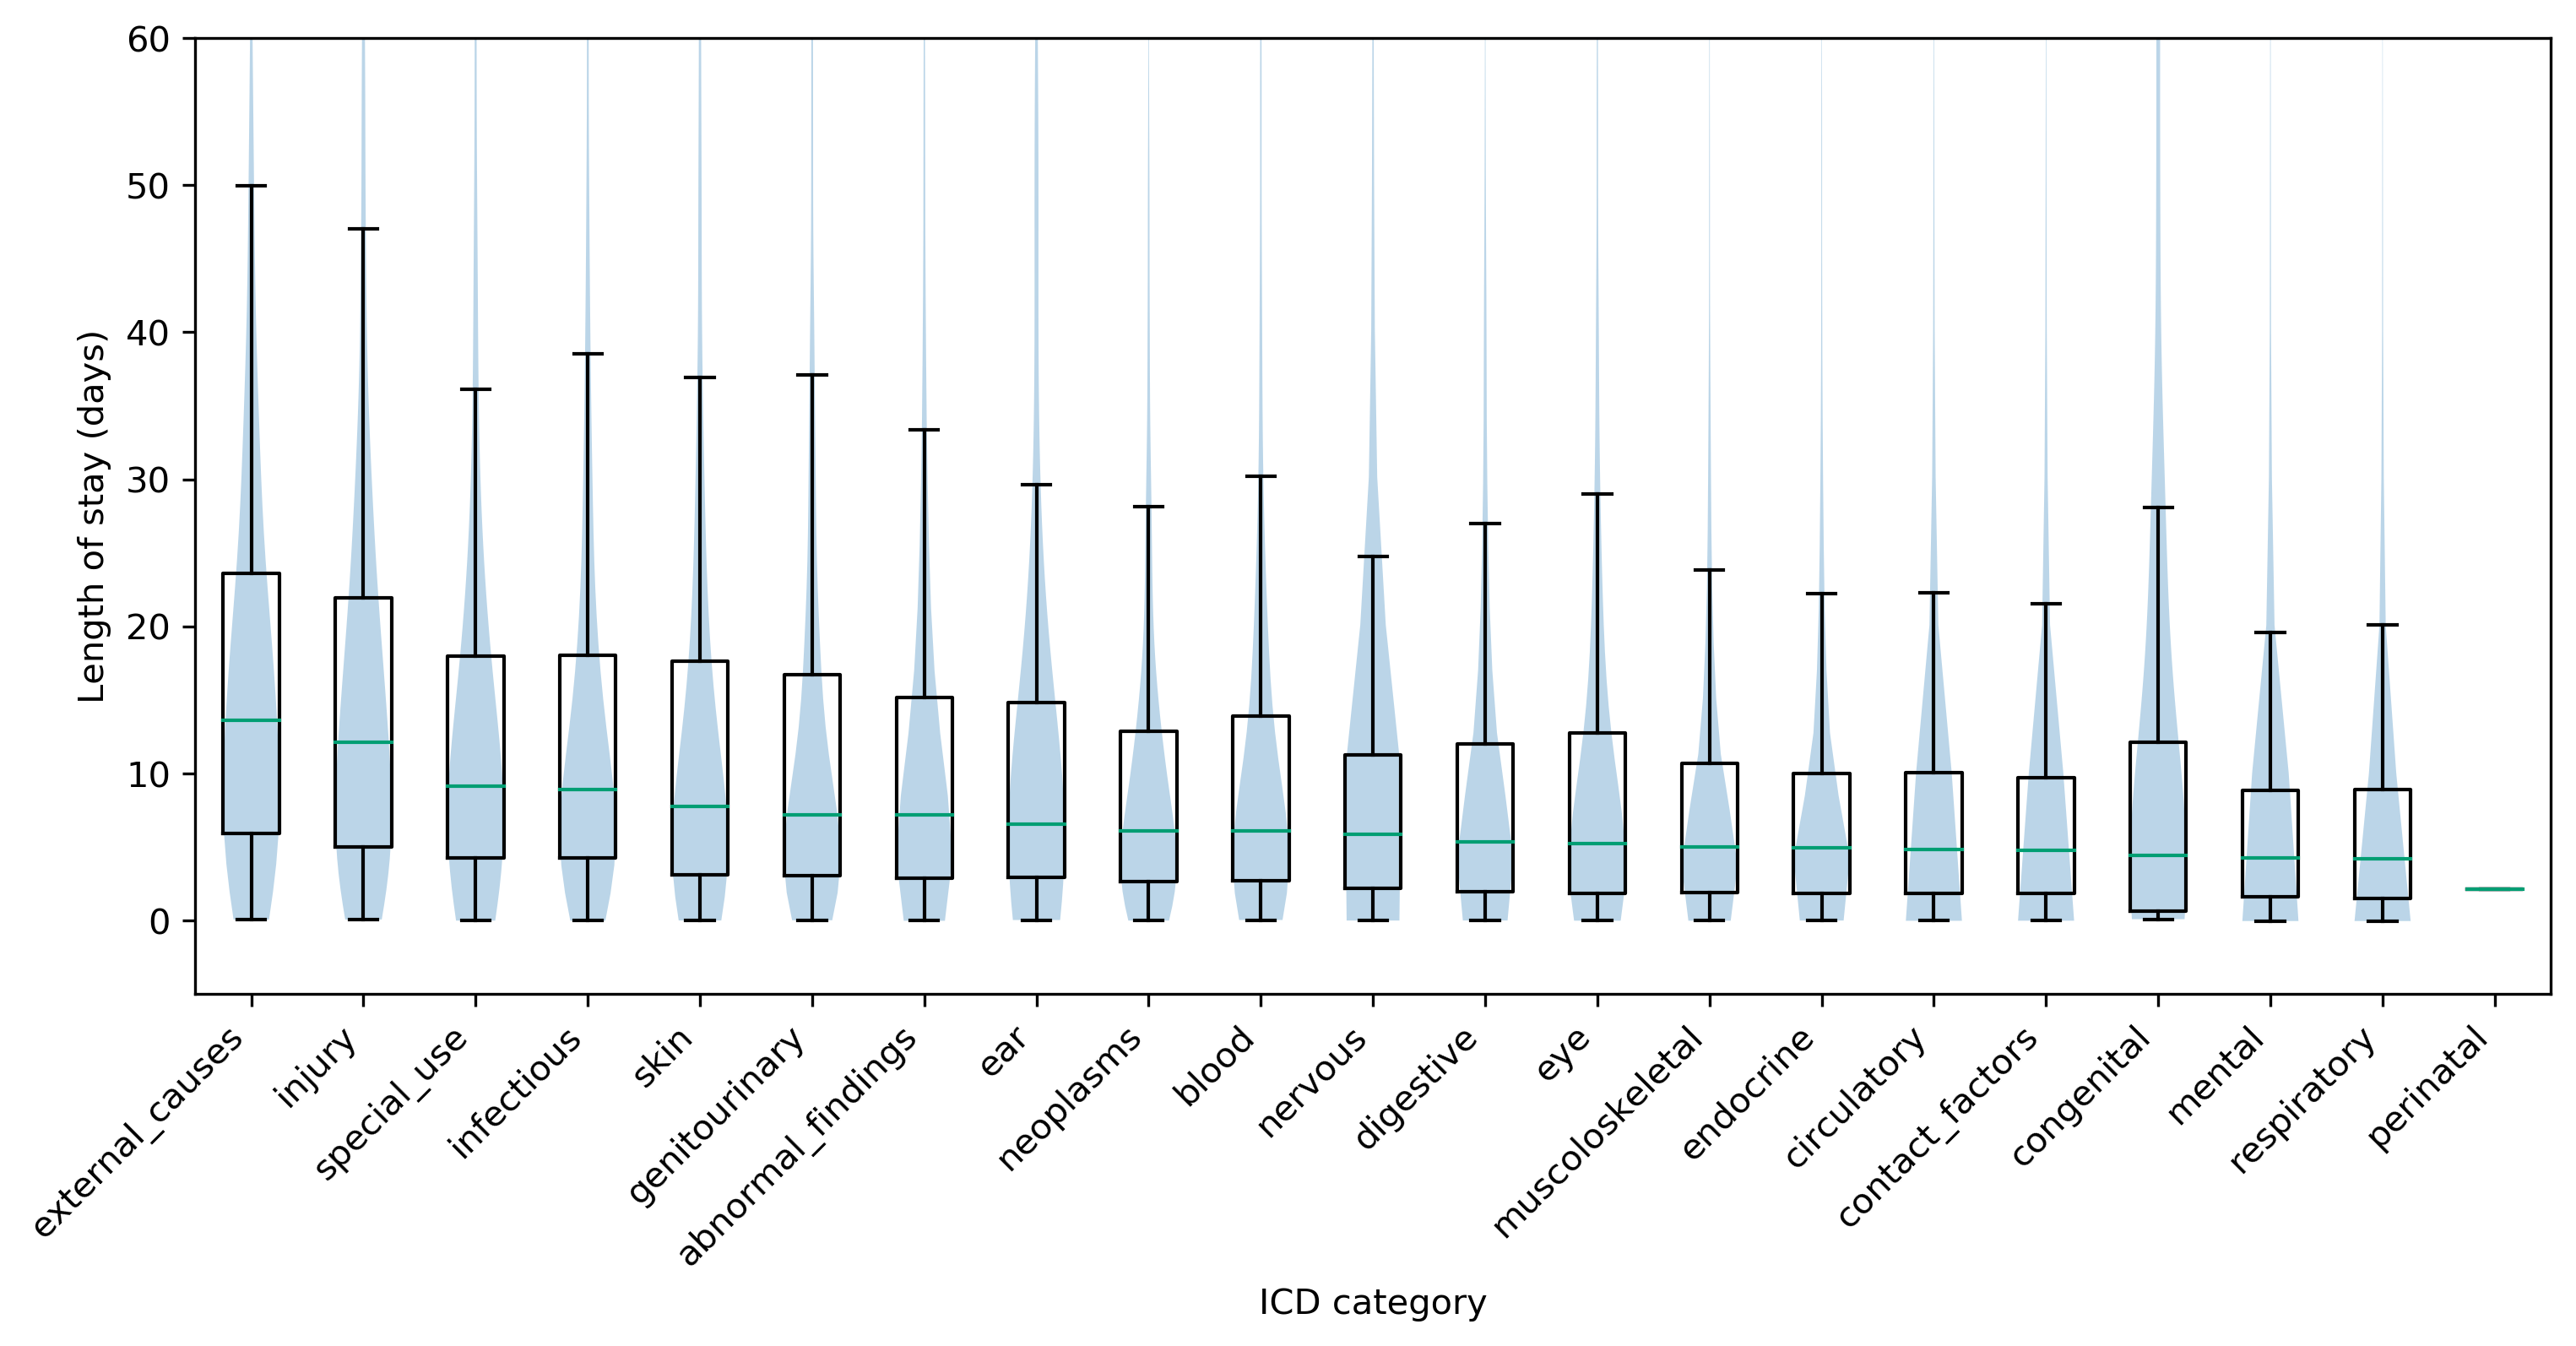

In [29]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=300)

xticklabels = []
for pos, (category, los_values) in enumerate(los_by_category_items):
    parts = ax.violinplot(los_values, (pos,), showextrema=False)
    ax.boxplot(los_values, positions=(pos,), widths=0.5, sym="")
    xticklabels.append(category)

    for body in parts["bodies"]:
        body.set_facecolor("tab:blue")

ax.set_xlabel("ICD category")
ax.set_ylabel("Length of stay (days)")
ax.set_xticklabels(xticklabels)

ax.set_ylim(-5, 60)

for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("right")

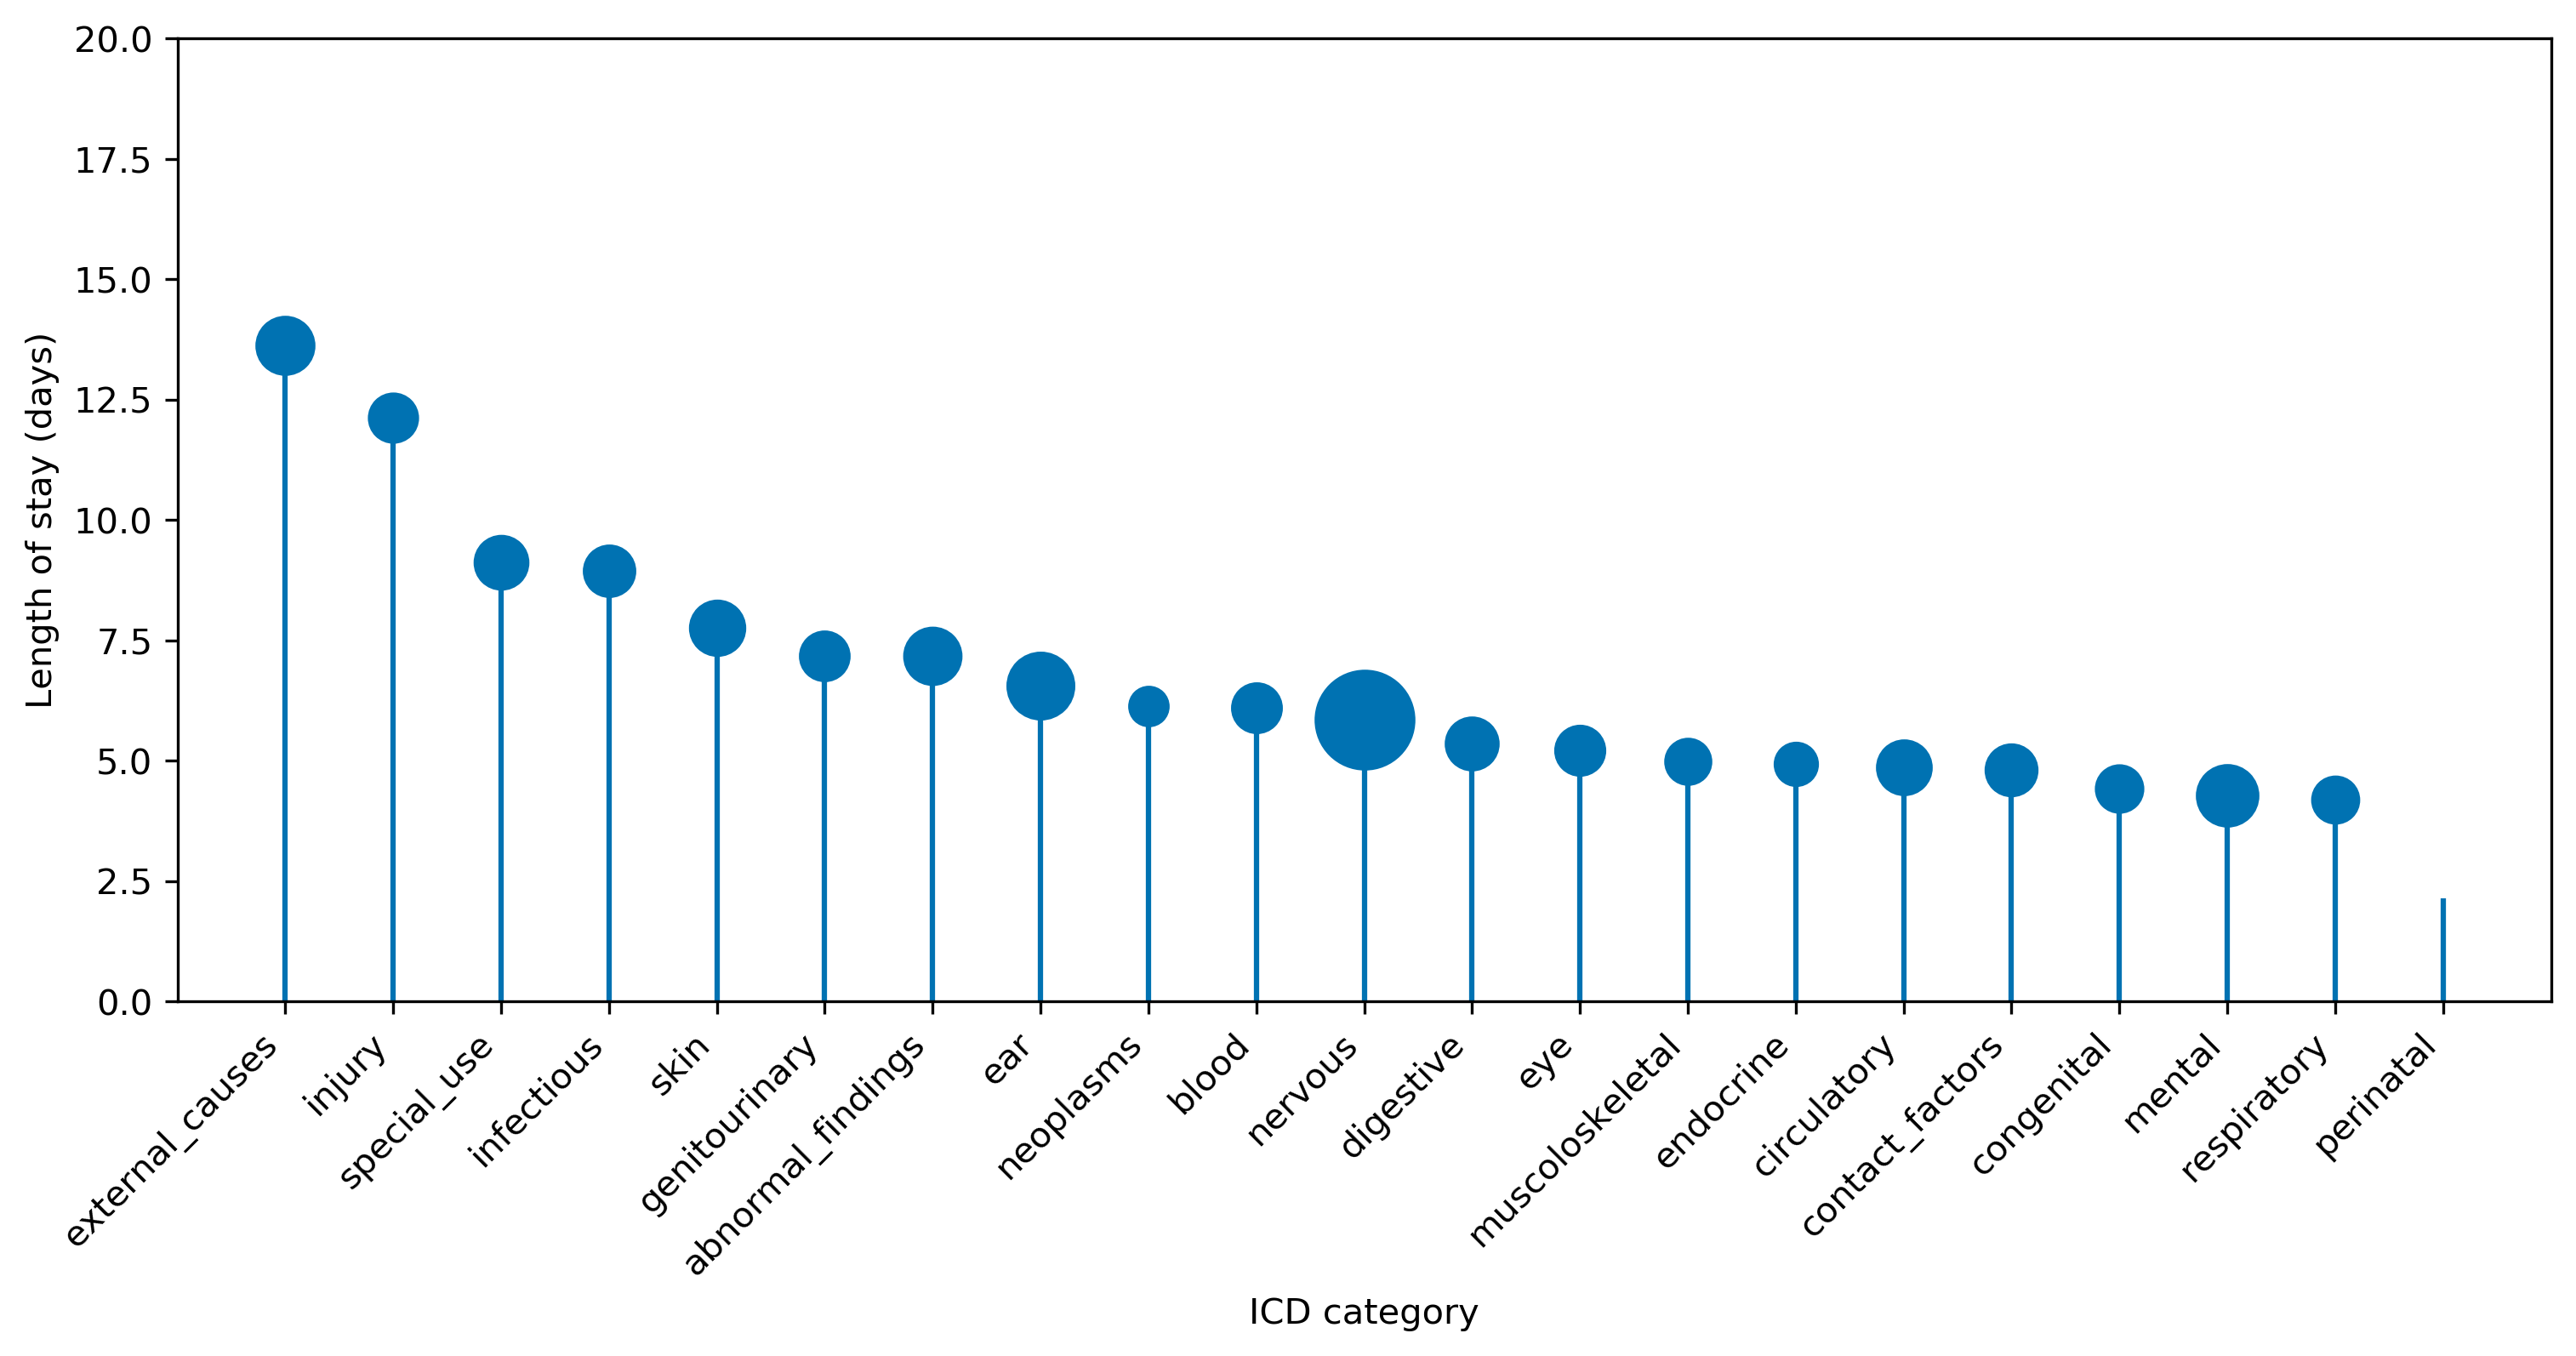

In [30]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=300)

xticklabels = []
for pos, (category, los_values) in enumerate(los_by_category_items):
    markerline, _, _ = ax.stem(
        [pos], [np.median(los_values)], use_line_collection=True
    )

    markerline.set_markersize(np.std(los_values) * .8)
    xticklabels.append(category)

ax.set_xlabel("ICD category")
ax.set_ylabel("Length of stay (days)")
ax.set_xticks(range(len(los_by_category_items)))
ax.set_xticklabels(xticklabels)

ax.set_ylim(0, 20)

for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("right")

# Measuring intervention effects

In [31]:
def summarise_intervention(statuses):

    pr_status, sn_status = statuses

    if pr_status == 0 and sn_status == 0:
        return "none"
    if pr_status and sn_status:
        return "both"
    if pr_status:
        return "pr"
    if sn_status:
        return "sn"

    return np.nan

In [32]:
copd["intervention"] = copd[["pr_status", "sn_status"]].apply(
    lambda statuses: summarise_intervention(statuses), axis=1
)

In [33]:
copd["intervention"].value_counts()

none    7736
pr      2575
sn       453
both     133
Name: intervention, dtype: int64

## Patient-level analysis

In [34]:
def get_n_patients(data, date):

    patients_in_system_at_date = (
        (data["admission_date"] <= date)
        & (date <= data["discharge_date"])
    )

    return len(data[patients_in_system_at_date])


get_parts = lambda x: (x.year, x.month, x.day)
year, month, day = get_parts(copd["admission_date"].min())
start_date = pd.to_datetime(f"{year}-{month}-{day}")

year, month, day = get_parts(copd["discharge_date"].max())
end_date = pd.to_datetime(f"{year}-{month}-{day + 1}")
system_size = pd.DataFrame(
    {"date": pd.date_range(start=start_date, end=end_date, freq="d")}
)

for intervention, data in copd.groupby("intervention"):
    system_size[intervention] = system_size["date"].apply(lambda date: get_n_patients(data, date))

/Users/henrywilde/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


,both,none,pr,sn
mean,0.190129,21.744286,5.309043,1.008943
std,0.463679,7.467548,2.881850,1.390915
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,11.000000,1.000000,0.000000
25%,0.000000,17.000000,3.000000,0.000000
50%,0.000000,21.000000,5.000000,0.000000
75%,0.000000,26.000000,7.000000,1.000000
95%,1.000000,34.000000,10.000000,4.000000
max,4.000000,59.000000,18.000000,7.000000


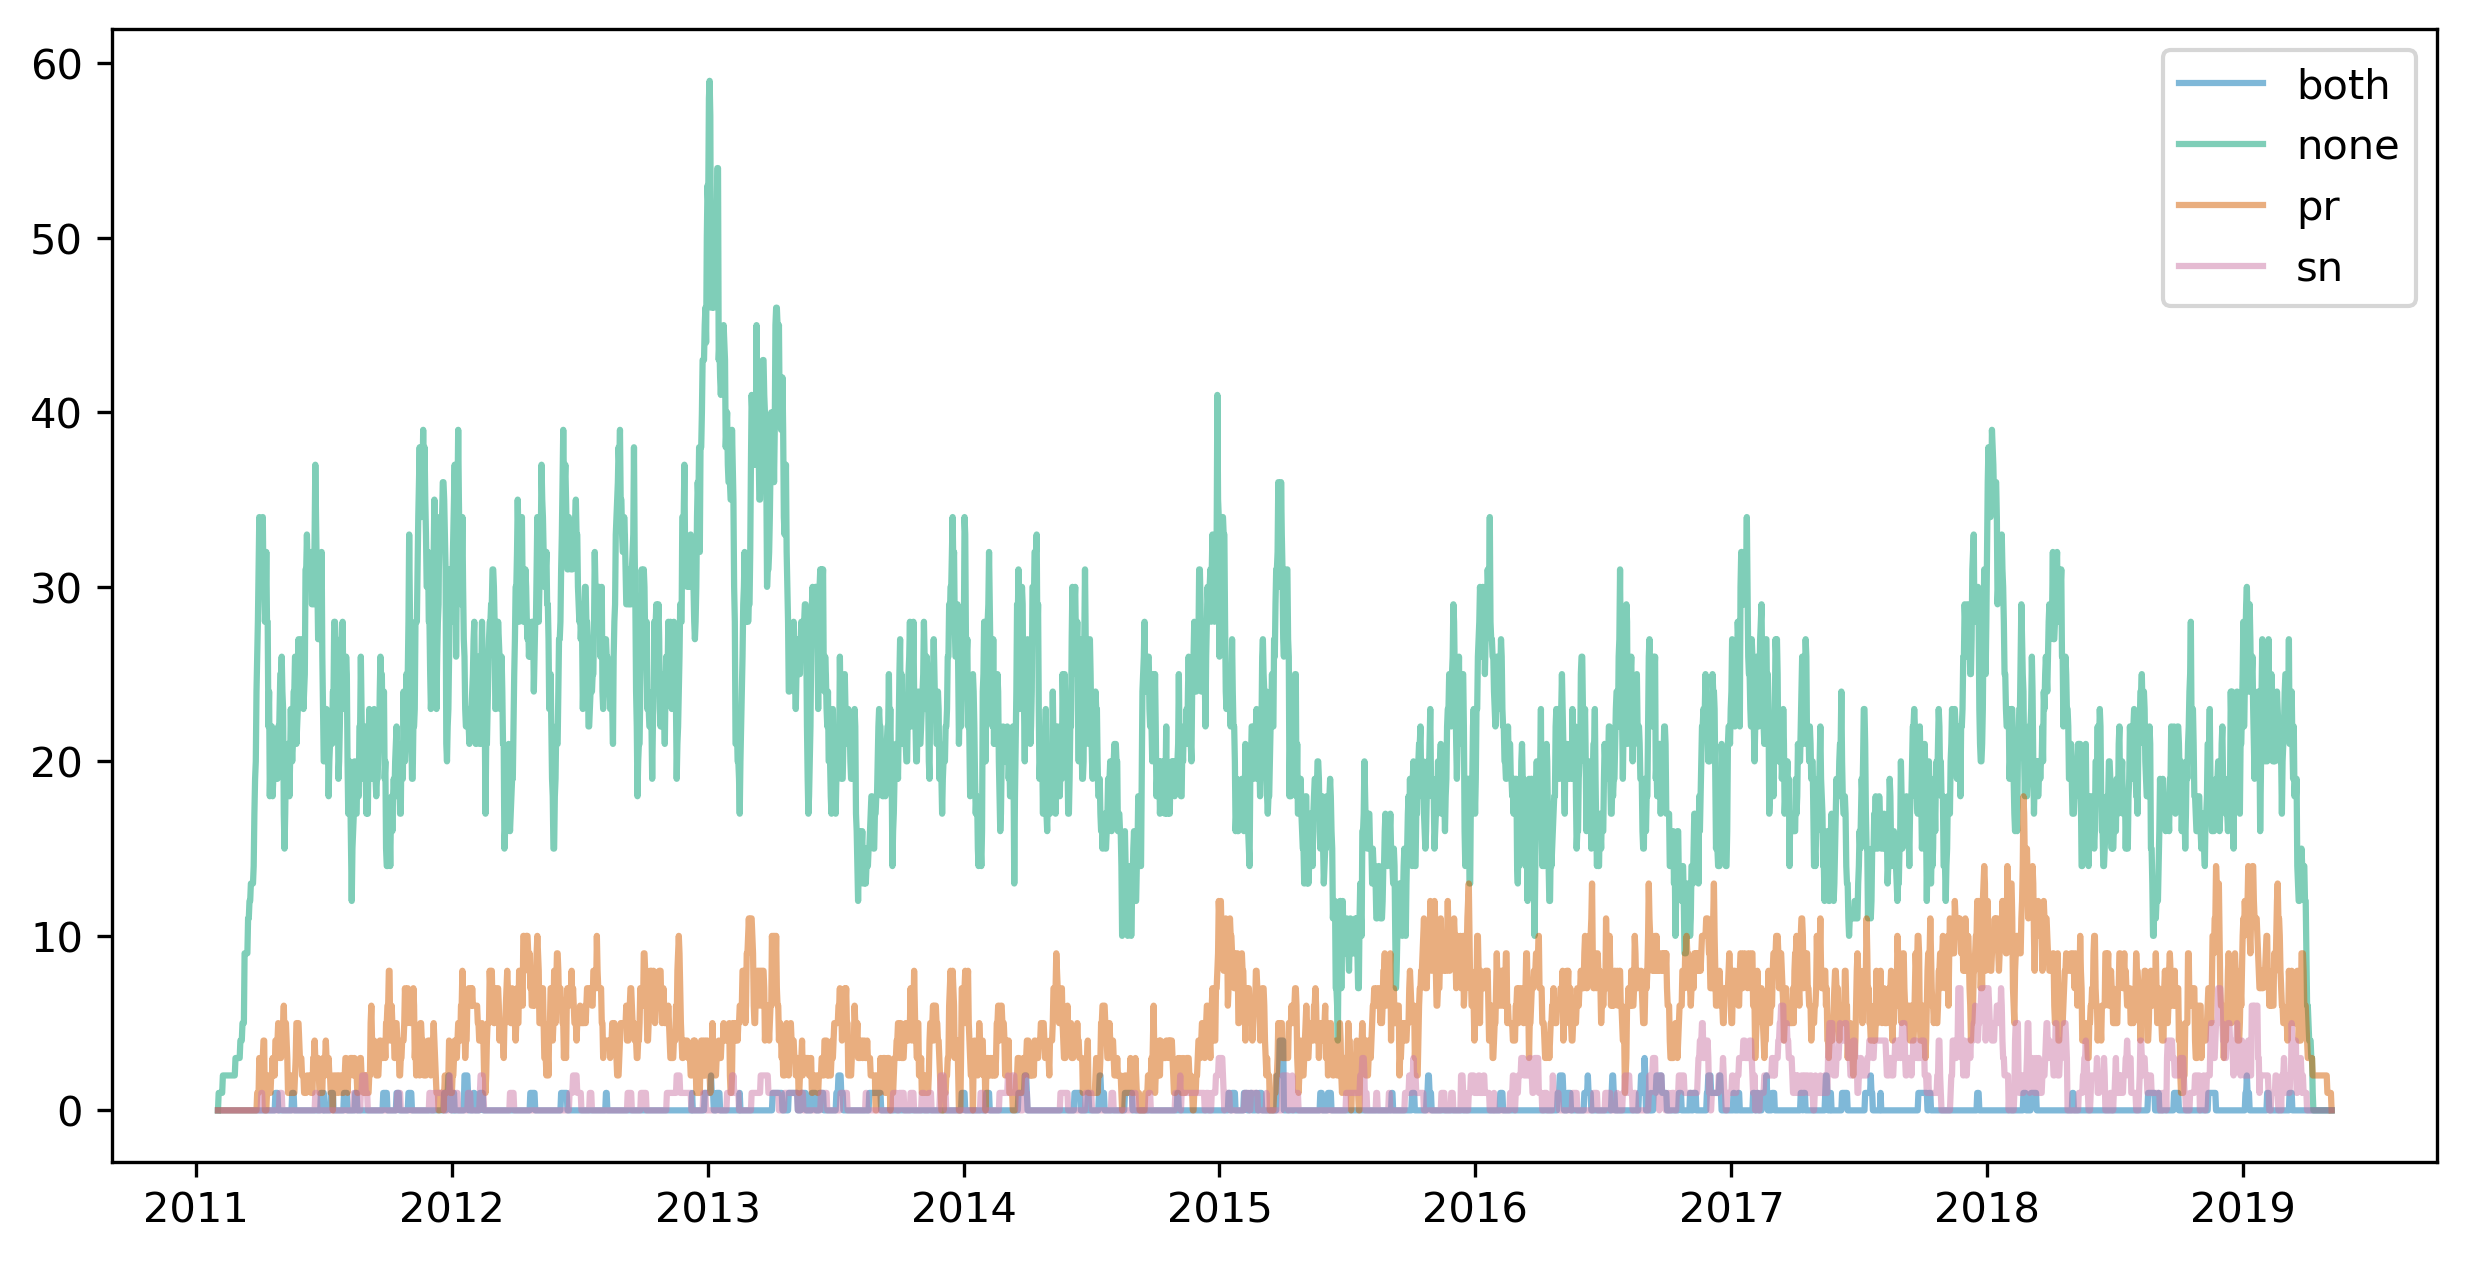

In [35]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

for intervention, data in copd.groupby("intervention"):
    ax.plot(system_size["date"], system_size[intervention], alpha=0.5, label=intervention)

ax.legend()

system_size.describe(percentiles=[.05, .25, .5, .75, .95]).iloc[1:, :]

In [36]:
patient_copd = pd.DataFrame(copd[["patient_id", "intervention"]].copy())

In [37]:
metric_columns = ("los", "n_wards", "n_spells", "spell_cost")
column_dicts = {}
for col in metric_columns:
    groupby = copd.groupby(["patient_id", "intervention"])
    column_dicts[f"mean_{col}"] = groupby[col].mean().to_dict()
    column_dicts[f"var_{col}"] = (groupby[col].var() / groupby[col].mean()).to_dict()

patient_admissions_per_month = (
    copd.groupby(["patient_id", "intervention"])["spell_id"].nunique() / copd["period"].nunique()
).to_dict()

In [38]:
patient_copd = patient_copd.set_index(["patient_id", "intervention"]).drop_duplicates().reset_index()

/Users/henrywilde/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:287: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/henrywilde/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:287: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


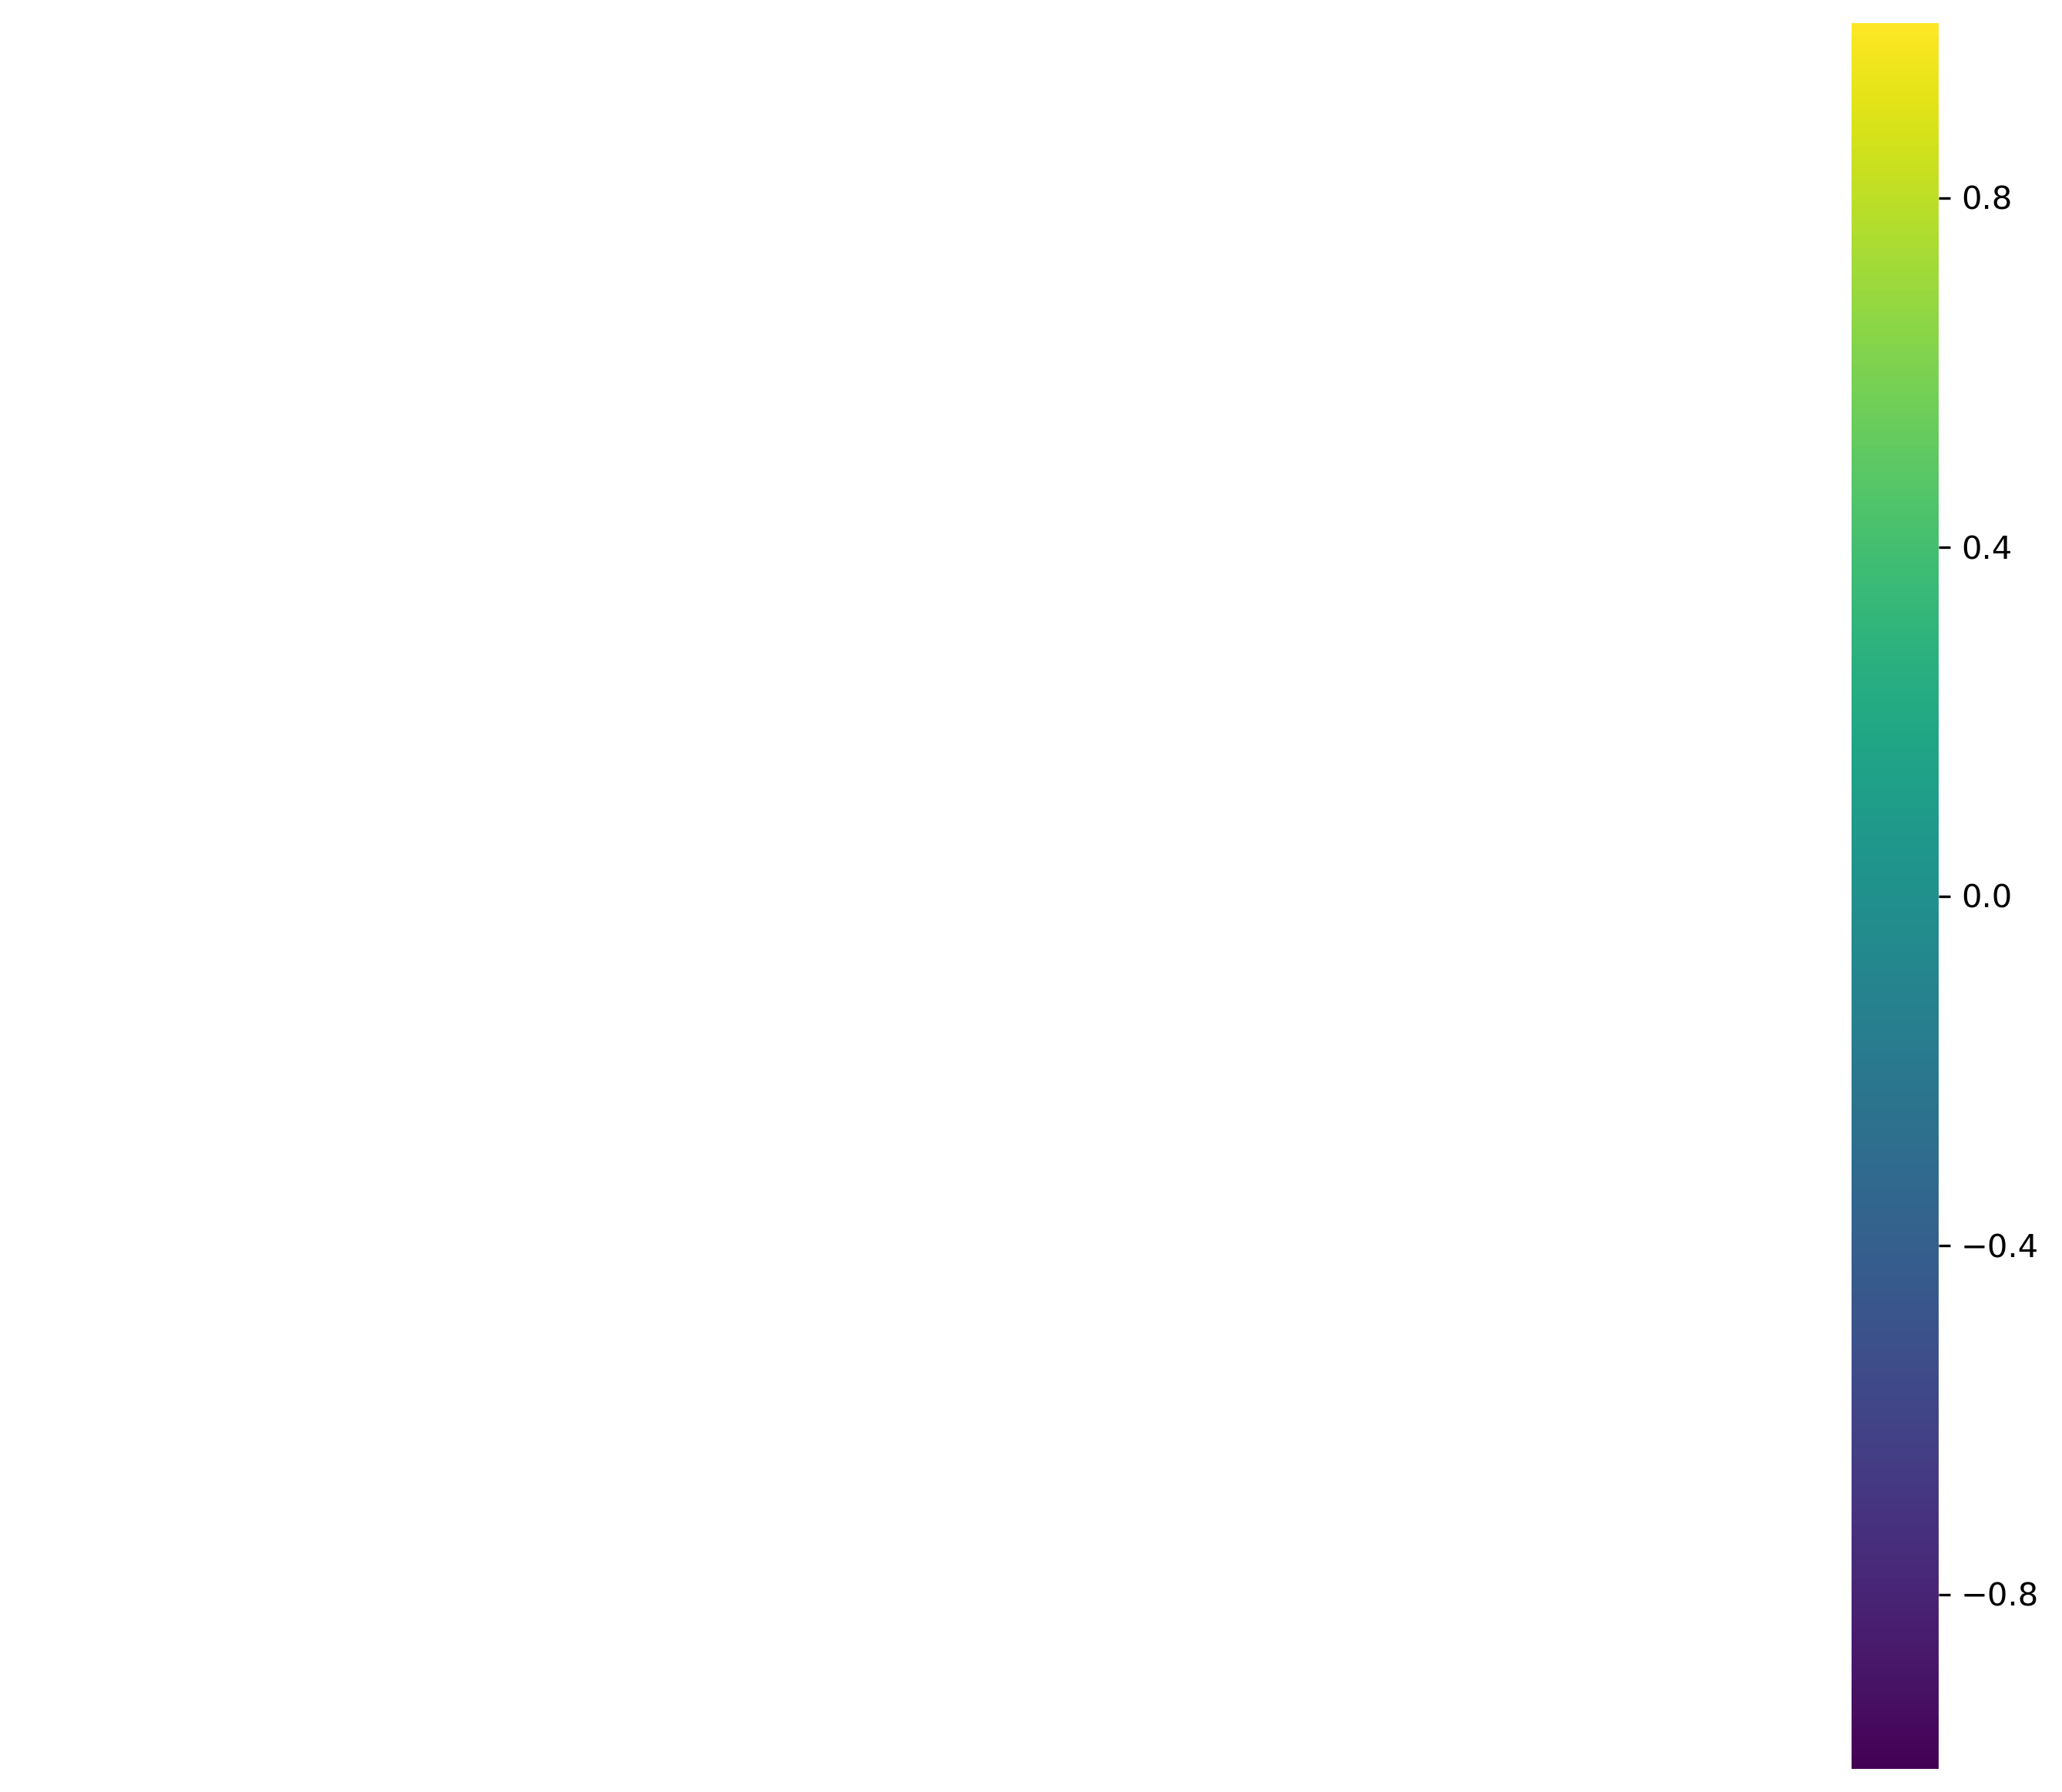

In [39]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)

correlation = patient_copd.set_index("patient_id").corr(method="spearman")

order = sorted(
    correlation.columns, key=lambda col: -abs(correlation[col]).sum()
)

correlation = correlation[order].reindex(order)

sbn.heatmap(
    correlation,
    square=True,
    cmap="viridis",
    vmin=-1,
    vmax=1,
    lw=0.1,
    annot=True,
    annot_kws={"fontsize": 12},
    ax=ax,
)

for label in ax.get_yticklabels():
    label.set_rotation(0)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("right")

### Patient-level intervention cost distribution

KeyError: 'mean_spell_cost'

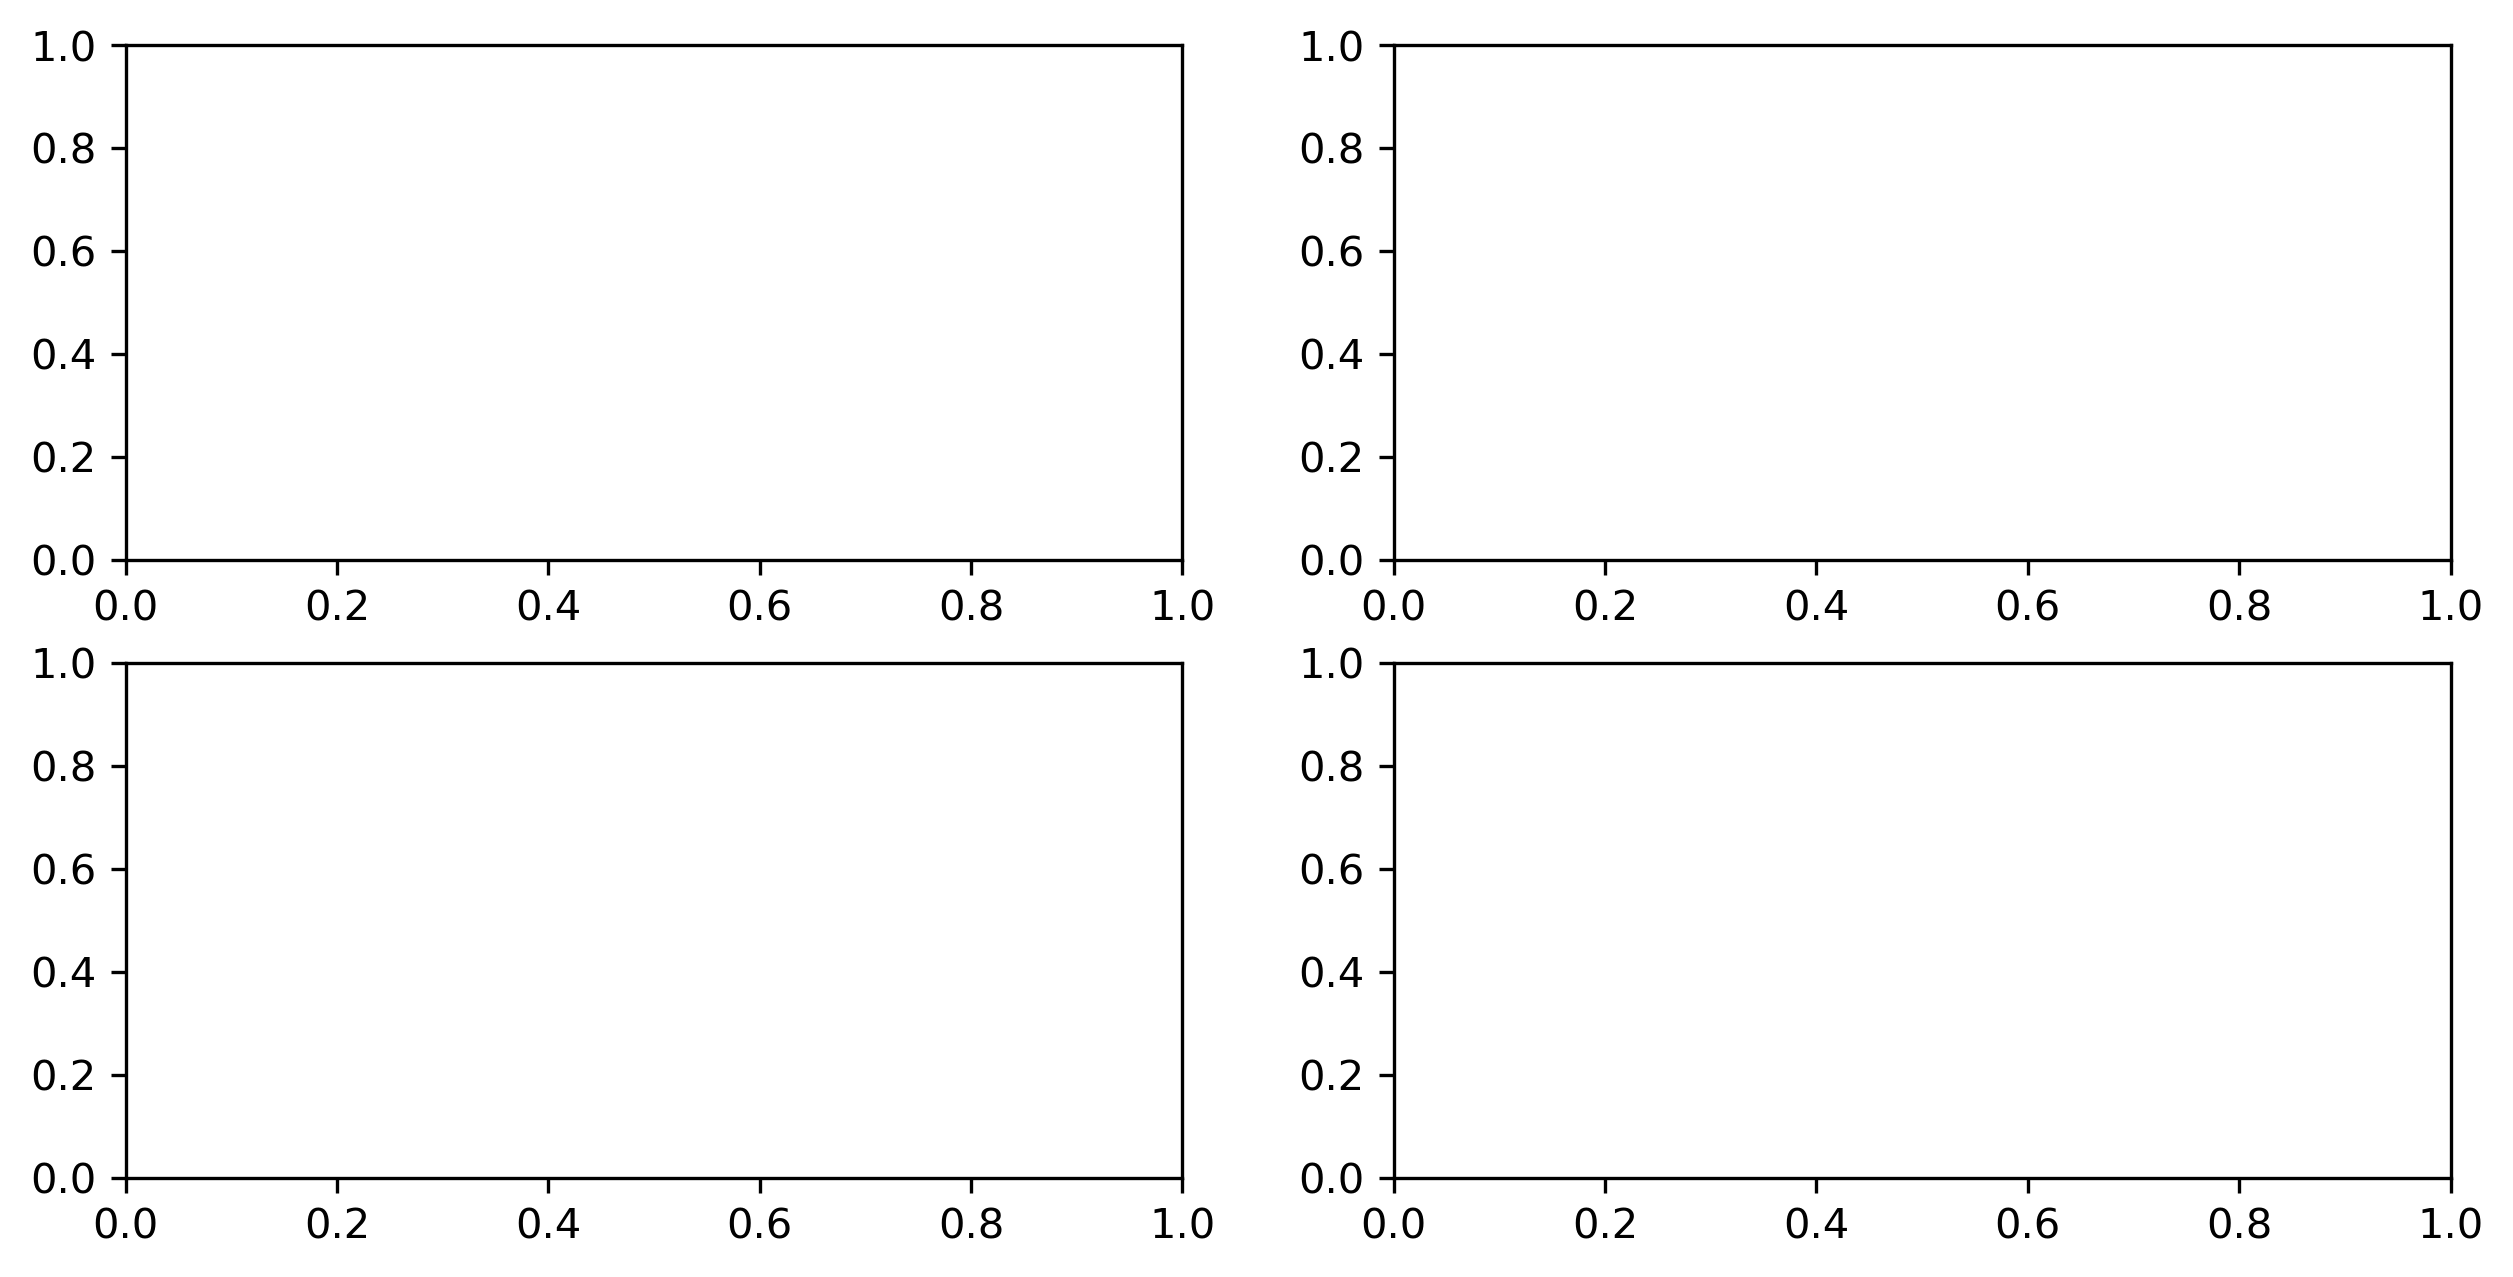

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), dpi=300)

for i, (intervention, data) in enumerate(patient_copd.groupby("intervention")):
    ax = axes[i % 2, int(i >= 2)]
    ax.scatter(
        data["mean_spell_cost"], data["var_spell_cost"], s=5, alpha=0.5, ec="None"
    )

    ax.set_xlim(0, 17500)
    ax.set_ylim(-500, 20000)
    ax.set_title(intervention.upper())
    ax.set_xlabel("Mean spell cost for patient (£1000s)")
    ax.set_ylabel("$C_v$")
    ax.set_xticklabels(range(0, 18, 2))

plt.tight_layout()


## Resource consumption over time

In [ ]:
def timeseries_plot(column, periodicity):

    fig, ax = plt.subplots(figsize=(8, 3), dpi=300)

    for intervention, data in copd.groupby("intervention"):
        data = data.set_index("admission_date")
        monthly = data[column].resample(periodicity).mean().ffill()

        ax.plot(monthly, label=intervention)

    ax.set_xlim("2014-01-01", "2019-04-01")
    ax.set_ylabel(column)
    ax.legend()
    plt.tight_layout()

In [ ]:
for column in ["true_los", "spell_cost"]:
    timeseries_plot(column, "BM")

In [ ]:
total_daily_admissions = (
    copd.groupby("admission_date")["spell_id"]
        .nunique()
        .reset_index()
        .rename({"spell_id": "nunique_spells"}, axis=1)
        .groupby("admission_date")["nunique_spells"]
        .sum()
)

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

for intervention, data in copd.groupby("intervention"):

    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
    
    num_admissions = (
        data.groupby("admission_date")["spell_id"]
            .nunique()
            .reset_index()
            .rename({"spell_id": "nunique_spells"}, axis=1)
            .groupby("admission_date")["nunique_spells"]
            .sum()
    )

    proportion = num_admissions / total_daily_admissions

    ax.scatter(proportion.index, proportion.values, label=intervention)

    ax.set_ylim(0, 1.1)
    ax.set_xlim("2014-01-01", "2019-04-01")
    ax.set_ylabel("nunique_spells")
    ax.legend()
    plt.tight_layout()

## Metrics of performance (LOS, ICDs, etc.)

In [ ]:
for column, yupper in zip(
    ("true_los", "n_wards", "n_icds", "n_copd_admissions_last_year", "charlson_gross"), (30, 4, 18, 8, 40)):

    fig, ax = plt.subplots(figsize=(8, 3), dpi=300)
    
    xticklabels = []
    for pos, (group, values) in enumerate(copd.groupby("intervention")[column]):
        ax.violinplot(values, (pos,), showextrema=False, points=1000)
        ax.boxplot(values, positions=(pos,), sym="", showmeans=True, widths=0.2)
        xticklabels.append(group)

    ax.set_xlabel("Intervention")
    ax.set_ylabel(column)
    ax.set_xticklabels(xticklabels)
    ax.set_ylim(values.min() - .5, yupper)

In [ ]:
intervention_categories = copd["intervention"].unique()

In [ ]:
def get_statistical_results(test_function, column):

    results = pd.DataFrame(
        columns=intervention_categories, index=intervention_categories
    )

    for ((group1, values1), (group2, values2)) in it.product(
        copd.groupby("intervention")[column], repeat=2
    ):
        if group1 != group2:
            results.loc[group1, group2] = test_function(values1, values2).pvalue

    return results

### Length of stay

In [ ]:
sp.stats.kruskal(*[copd[copd["intervention"] == val]["true_los"] for val in intervention_categories])

In [ ]:
mann_whitney_los_results = get_statistical_results(
    sp.stats.mannwhitneyu, "true_los"
)

mann_whitney_los_results

### Number of wards

In [ ]:
sp.stats.kruskal(*[copd[copd["intervention"] == val]["n_wards"] for val in intervention_categories])

In [ ]:
mann_whitney_n_wards_results = get_statistical_results(
    sp.stats.mannwhitneyu, "n_wards"
)

mann_whitney_n_wards_results

### Number of ICDs

In [ ]:
sp.stats.kruskal(*[copd[copd["intervention"] == val]["n_icds"] for val in intervention_categories])

In [ ]:
mann_whitney_n_icds_results = get_statistical_results(
    sp.stats.mannwhitneyu, "n_icds"
)

mann_whitney_n_icds_results

### Number of COPD-related admissions in the last year

In [ ]:
sp.stats.kruskal(
    *[copd[copd["intervention"] == val]["n_copd_admissions_last_year"] for val in intervention_categories]
)

In [ ]:
mann_whitney_n_icds_results = get_statistical_results(
    sp.stats.mannwhitneyu, "n_copd_admissions_last_year"
)

mann_whitney_n_icds_results

### Charlson comorbidity index

In [ ]:
sp.stats.kruskal(
    *[copd[copd["intervention"] == val]["charlson_gross"] for val in intervention_categories]
)

In [ ]:
mann_whitney_charlson_gross_results = get_statistical_results(
    sp.stats.mannwhitneyu, "charlson_gross"
)

mann_whitney_charlson_gross_results

# Regression modelling

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
copd["pr"] = np.where(copd["pr_status"] != 0, 1, 0)
copd["sn"] = np.where(copd["sn_status"] != 0, 1, 0)

The hope is to get something better than the mean or median models.

In [ ]:
X = copd[["pr", "sn"]].dropna()
y = copd["los"].iloc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_pred_mean = np.ones_like(y_test) * copd["los"].mean()
y_pred_median = np.ones_like(y_test) * copd["los"].median()

In [ ]:
{
    "Explained variance": metrics.explained_variance_score(y_test, y_pred_mean),
    "Root mean squared error": np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean)),
    "Median absolute error": metrics.median_absolute_error(y_test, y_pred_mean),
    "R^2 score": metrics.r2_score(y_test, y_pred_mean),
}   

In [ ]:
{
    "Explained variance": metrics.explained_variance_score(y_test, y_pred_median),
    "Root mean squared error": np.sqrt(metrics.mean_squared_error(y_test, y_pred_median)),
    "Median absolute error": metrics.median_absolute_error(y_test, y_pred_median),
    "R^2 score": metrics.r2_score(y_test, y_pred_median),
} 

### The simplest model (intervention binaries only)

In [ ]:
X = copd[["pr", "sn"]].dropna()
y = copd["los"].iloc[X.index]

# poly = PolynomialFeatures(interaction_only=True, include_bias=False).fit(X)
# X = pd.DataFrame(poly.transform(X), columns=["pr", "sn", "pr_sn_interaction"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", random_state=0, max_iter=1000
).fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

In [ ]:
{
    "Explained variance": metrics.explained_variance_score(y_test, y_pred),
    "Root mean squared error": np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    "Median absolute error": metrics.median_absolute_error(y_test, y_pred),
    "R^2 score": metrics.r2_score(y_test, y_pred),
}    

### Introducing demographic information

In [ ]:
copd["gender_code"] = np.where(copd["gender"] == "M", 1, 0)

In [ ]:
demographics = ["age", "gender_code"]

X = copd[["pr", "sn"] + demographics].dropna()
y = copd["los"].iloc[X.index]

# poly = PolynomialFeatures(interaction_only=True, include_bias=False).fit(X)
# X = pd.DataFrame(poly.transform(X), columns=["pr", "sn", "pr_sn_interaction"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", random_state=0, max_iter=1000
).fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

In [ ]:
{
    "Explained variance": metrics.explained_variance_score(y_test, y_pred),
    "Root mean squared error": np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    "Median absolute error": metrics.median_absolute_error(y_test, y_pred),
    "R^2 score": metrics.r2_score(y_test, y_pred),
}    

### Introducing condition indicators

In [ ]:
X = copd[["pr", "sn"] + demographics + list(observed_icds)].dropna()
y = copd["los"].iloc[X.index]

# poly = PolynomialFeatures(interaction_only=True, include_bias=False).fit(X)
# X = pd.DataFrame(poly.transform(X), columns=["pr", "sn", "pr_sn_interaction"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", random_state=0, max_iter=1000
).fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

In [ ]:
{
    "Explained variance": metrics.explained_variance_score(y_test, y_pred),
    "Root mean squared error": np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    "Median absolute error": metrics.median_absolute_error(y_test, y_pred),
    "R^2 score": metrics.r2_score(y_test, y_pred),
} 

### Historical data

In [ ]:
from dateutil.relativedelta import relativedelta

In [ ]:
def _get_relevant_spells(id_date_tuple, period):

    patient_id, admission_date = id_date_tuple
    
    patient_spells = copd[copd["patient_id"] == patient_id]
    period_before = pd.to_datetime(admission_date + relativedelta(**period))

    mask = (
        (patient_spells["admission_date"] >= period_before)
        & (patient_spells["admission_date"] < admission_date)
    )
    relevant_spells = patient_spells.loc[mask]

    return relevant_spells


def get_mean_los_last_period(id_date_tuple, period=None):

    relevant_spells = _get_relevant_spells(id_date_tuple, period)
    return relevant_spells["true_los"].mean()

def get_n_admissions_last_period(id_date_tuple, period=None):

    relevant_spells = _get_relevant_spells(id_date_tuple, period)
    return relevant_spells["spell_id"].nunique()

def get_mean_charlson_gross_last_period(id_date_tuple, period=None):

    relevant_spells = _get_relevant_spells(id_date_tuple, period)
    return relevant_spells["charlson_gross"].mean()


In [ ]:
copd["mean_los_last_halfyear"] = copd[["patient_id", "admission_date"]].apply(
    lambda id_date_tuple: get_mean_los_last_period(id_date_tuple, {"months": -6}), axis=1
)

copd["n_admissions_last_quarter"] = copd[["patient_id", "admission_date"]].apply(
    lambda id_date_tuple: get_n_admissions_last_period(id_date_tuple, {"months": -3}), axis=1
)

copd["mean_charlson_gross_last_year"] = copd[["patient_id", "admission_date"]].apply(
    lambda id_date_tuple: get_mean_charlson_gross_last_period(id_date_tuple, {"years": -1}), axis=1
)

In [ ]:
X = copd[
    [
        "pr",
        "sn",
        "mean_los_last_halfyear",
        "n_admissions_last_quarter",
        "mean_charlson_gross_last_year",
        *observed_icds
    ]
].dropna()

y = copd["los"].iloc[X.index]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
# lr = LogisticRegression(
#     solver="lbfgs", multi_class="multinomial", random_state=0, max_iter=1000
# ).fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

In [ ]:
{
    "Explained variance": metrics.explained_variance_score(y_test, y_pred),
    "Root mean squared error": np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    "Median absolute error": metrics.median_absolute_error(y_test, y_pred),
    "R^2 score": metrics.r2_score(y_test, y_pred),
} 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

n_observations = 101
data = pd.DataFrame(
    {"actual": y_test, "predicted": y_pred}
).dropna().iloc[:n_observations]

ind = np.arange(0, len(y_test[:n_observations]))
pad = 0.15
width = 0.35
ax.bar(pad+ind, data["actual"], width, color='tab:blue', alpha=0.8, label="actual")
ax.bar(pad+ind+width, data["predicted"], width, color='tab:orange', label="predicted")

ax.set_ylabel('Length of Stay (days)')
ax.set_xlabel('Observation')

mean_los = copd["los"].mean()
median_los = copd["los"].median()
ax.axhline(y=median_los, xmin=0, xmax=20, ls='--', color='gray', label="median los")
ax.axhline(y=mean_los, xmin=0, xmax=20, ls='--', color='red', alpha=0.8, label="mean los")

ax.legend()